# ALICORN ANALYSIS

# Import necessary packages

In [8]:
import warnings 
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from scipy import stats
from pylab import rcParams
from matplotlib.pyplot import MultipleLocator

rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.tree import export_graphviz
from IPython.display import Image 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from patsy import dmatrices
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree, metrics
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, f1_score, auc, confusion_matrix
import time
from sklearn.metrics import roc_auc_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge, RidgeClassifier
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [12]:
# Check working directory
os.getcwd()

'/Users/maihoang/Downloads/MASTER PROGRAM/ALY 6080'

# Part 1 - Data preprocessing (understanding the data)

## Load data

In [13]:
Returns = pd.read_excel('Returnsbyseries.xlsx')
VCexists = pd.read_excel('VCexists.xlsx')
Devops = pd.read_excel('Devops_data.xlsx')

## 1. Returns By Series 

In [8]:
Returns.head(10)

Company PBID  Exit Date           Exit Type VC Round Stock Type   Payout  \
0     40452-67 2016-11-30          Buyout/LBO            Series A      NaN   
1     40452-67 2016-11-30          Buyout/LBO            Series B      NaN   
2     40452-67 2016-11-30          Buyout/LBO            Series C      NaN   
3     40452-67 2016-11-30          Buyout/LBO            Series D      NaN   
4     40452-67 2016-11-30          Buyout/LBO            Series E      NaN   
5     40452-67 2016-11-30          Buyout/LBO            Series F      NaN   
6     40452-67 2016-11-30          Buyout/LBO            Series G      NaN   
7     40452-67 2016-11-30          Buyout/LBO            Series H      NaN   
8     58412-62 2015-10-16  Merger/Acquisition                Seed  18.0429   
9     58412-62 2015-10-16  Merger/Acquisition            Series A  43.3029   

   Return %  Return MOIC  VC Deal Size (millions) VC Round Close Date  \
0       NaN          NaN                 7.000001          2002-03-13   
1       NaN          NaN                 7.000001          2002-03-13   
2       NaN          NaN                11.000000          2006-06-12   
3       NaN          NaN                11.000000          2006-06-12   
4       NaN          NaN                11.000000          2006-06-12   
5       NaN          NaN                 4.734979          2014-04-02   
6       NaN          NaN                 4.734979          2014-04-02   
7       NaN          NaN                 3.499998          2016-04-04   
8  17.04290     18.04290                 1.000000          2013-02-26   
9   6.21714      7.21714                 6.000000          2013-08-12   

   Time Since VC Round  
0            14.728767  
1            14.728767  
2            10.476712  
3            10.476712  
4            10.476712  
5             2.665753  
6             2.665753  
7             0.657534  
8             2.635616  
9             2.178082

In [9]:
Returns.shape

(245, 10)

The data contains 245 records and 10 features. Company PBID is unique for every records and acts as primary key.

The type of the columns as follows:

In [17]:
Returns.dtypes

Company PBID                       object
Exit Date                  datetime64[ns]
Exit Type                          object
VC Round Stock Type                object
Payout                            float64
Return %                          float64
Return MOIC                       float64
VC Deal Size (millions)           float64
VC Round Close Date        datetime64[ns]
Time Since VC Round               float64
dtype: object

We do not have categorical features

In [452]:
#You can look at summary of numerical fields by using describe() function
Returns.describe(include=[object])

Company PBID           Exit Type VC Round Stock Type
count           245                 245                 245
unique          100                   4                  10
top        53557-21  Merger/Acquisition            Series A
freq              8                 159                  79

* The most popular Exit Type are Merger/Acquisition;
* Top VC Round Stock Type is Series A;

In [499]:
Returns.describe().round()

Payout  Return %  Return MOIC  VC Deal Size  Time Since VC Round
count   141.0     141.0        141.0         245.0                245.0
mean    164.0      17.0         18.0          20.0                  4.0
std     345.0      50.0         50.0          31.0                  3.0
min       0.0      -1.0          0.0           0.0                  0.0
25%      15.0       0.0          1.0           4.0                  2.0
50%      50.0       2.0          3.0          10.0                  4.0
75%     118.0       9.0         10.0          20.0                  6.0
max    2227.0     446.0        447.0         251.0                 17.0

## Data Cleaning

In [10]:
# Counts all missing values
total = Returns.isnull().sum().sort_values(ascending = False)
frames = [total]
# pd.concat(): axis=0 means index, axis=1 means column, keys = name of the column.
missing_data = pd.concat(frames, axis = 1, keys = ['Total'])
missing_data.head()

Total
Return MOIC            104
Return %               104
Payout                 104
Time Since VC Round      0
VC Round Close Date      0

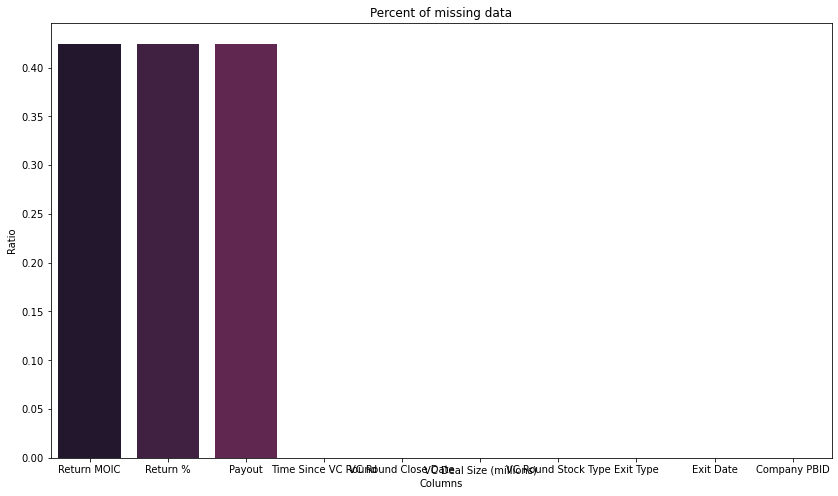

In [100]:
# Presenting missing values by using barplot
missing = Returns.isnull().sum().sort_values(ascending=False).div(len(Returns))
plt.figure(figsize=(14,8))
sns.barplot(x=missing.index, y=missing.values, palette="rocket")
plt.title("Percent of missing data")
plt.xlabel("Columns")
plt.ylabel("Ratio")
plt.show()

Missing values ratio in Return MOIC, Return % and Payout got 40% the dataset

In [46]:
# Renames the column VC Deal Size (millions) to VC Deal Size
Returns.rename(columns={'VC Deal Size (millions)': 'VC Deal Size'},inplace=True)

## EDA
### Correlation

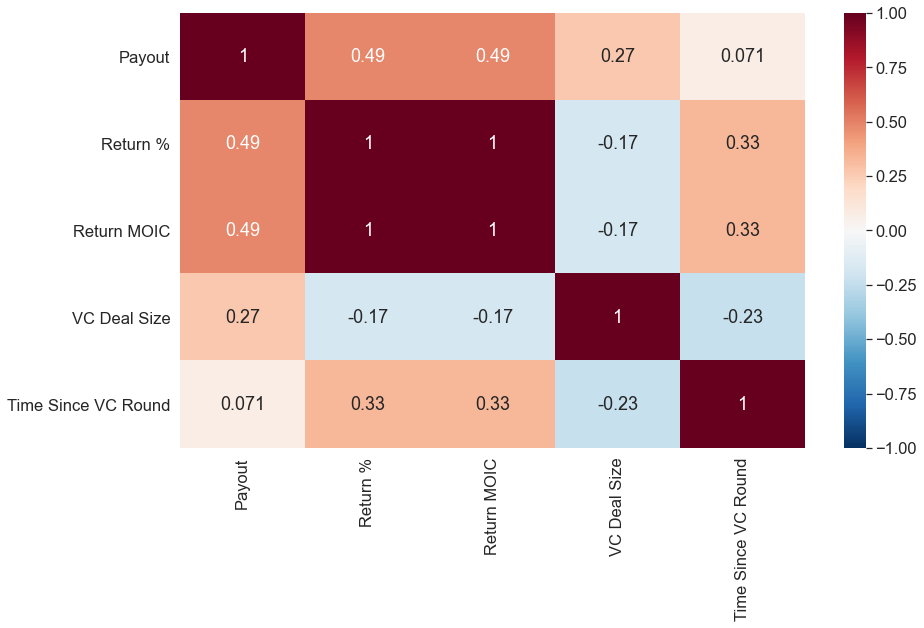

In [469]:
# Correlation of Returns by series
correlation = Returns.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

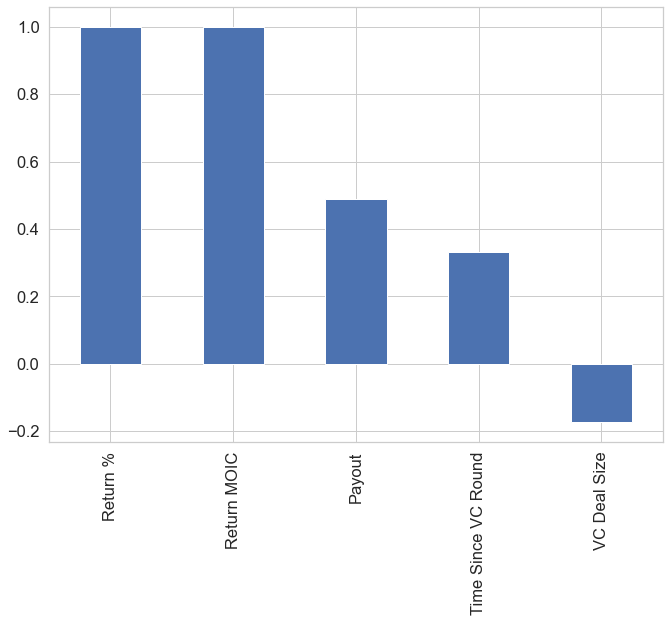

In [471]:
correlations = correlation['Return MOIC'].sort_values(ascending=False)
plot_corr = correlations.plot(kind='bar')

In [467]:
correlation['Return MOIC'].sort_values(ascending=False).round(3).head(10).to_frame()

Return MOIC
Return %                   1.000
Return MOIC                1.000
Payout                     0.489
Time Since VC Round        0.332
VC Deal Size              -0.173

### Outliner

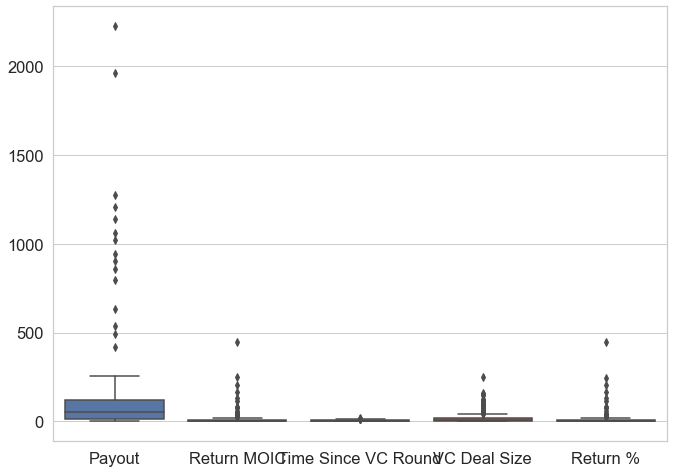

In [476]:
# Boxplot of Returns by series
sns.boxplot(data = Returns[['Payout','Return MOIC','Time Since VC Round','VC Deal Size','Return %']])

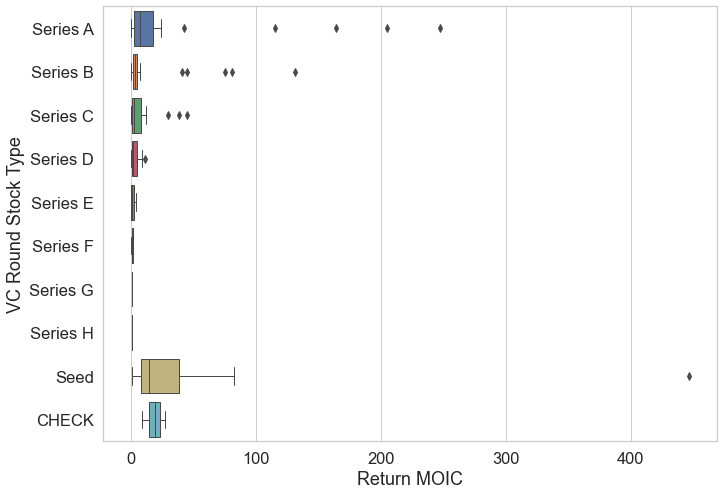

In [299]:
# Relationship of Return MOIC & VC Round Stock Type
sns.set(style="whitegrid",rc={'figure.figsize':(11,8)},font_scale=1.5)
sns.boxplot(x="Return MOIC", y="VC Round Stock Type", data=Returns, linewidth=1)

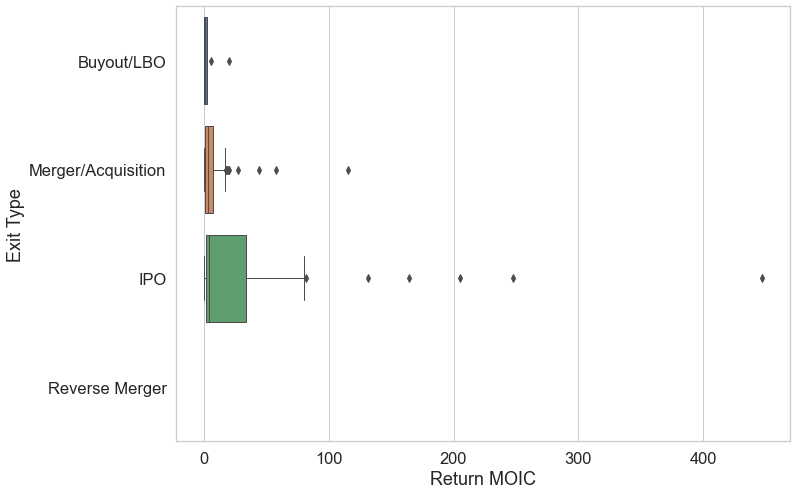

In [453]:
# Relationship of Return MOIC & Exit Type
sns.set(style="whitegrid",rc={'figure.figsize':(11,8)},font_scale=1.5)
sns.boxplot(x="Return MOIC", y="Exit Type", data=Returns, linewidth=1)

## Numerical Variables

In [18]:
Returns.describe().round()

Payout  Return %  Return MOIC  VC Deal Size (millions)  \
count   141.0     141.0        141.0                    245.0   
mean    164.0      17.0         18.0                     20.0   
std     345.0      50.0         50.0                     31.0   
min       0.0      -1.0          0.0                      0.0   
25%      15.0       0.0          1.0                      4.0   
50%      50.0       2.0          3.0                     10.0   
75%     118.0       9.0         10.0                     20.0   
max    2227.0     446.0        447.0                    251.0   

       Time Since VC Round  
count                245.0  
mean                   4.0  
std                    3.0  
min                    0.0  
25%                    2.0  
50%                    4.0  
75%                    6.0  
max                   17.0

* The average amount of Return MOIC is 18 millions;
* The average Time since VC round is four years.
* More than 75% companies have return MOIC is about 10 millions.

### Scatter plot between features

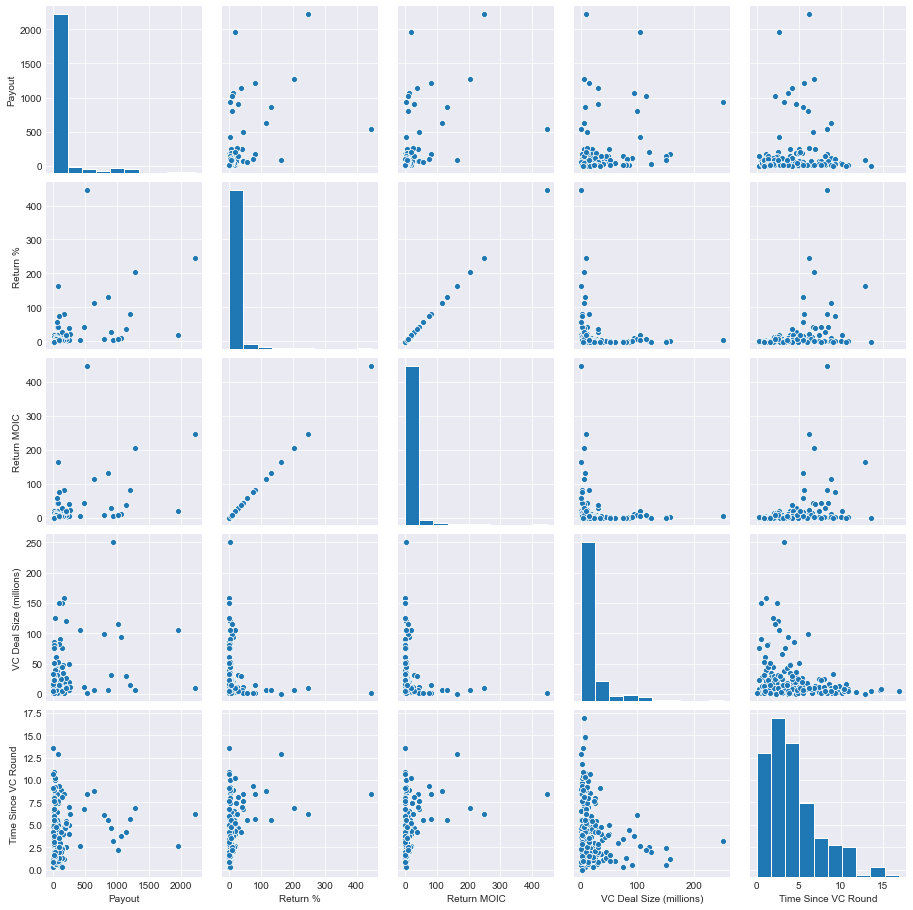

In [21]:
sns.pairplot(Returns)

## VC exits

In [454]:
# Show first 5 records of dataframe
VCexists.head(5)

Company PBID  Exit Date  Exit Size  Pre Value  Post Value  \
0     82024-93 2016-04-11        NaN        NaN         NaN   
1    155748-70 2017-11-15        NaN        NaN         NaN   
2    160695-55 2017-01-13        NaN        NaN         NaN   
3     81857-08 2019-03-18      166.0        NaN       166.0   
4    168816-52 2017-08-16        NaN        NaN         NaN   

            Exit Type Last VC Deal Type  VC Capital Raised  \
0  Merger/Acquisition    Early Stage VC                NaN   
1  Merger/Acquisition    Early Stage VC                NaN   
2  Merger/Acquisition    Early Stage VC                0.7   
3  Merger/Acquisition    Early Stage VC               10.1   
4  Merger/Acquisition        Seed Round                2.0   

   Preferred Capital Raised  % Preferred Capital Raised  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

   Preferred Capital Raised Combination  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   % Preferred Capital Raised Combination     MOIC  \
0                                     NaN      NaN   
1                                     NaN      NaN   
2                                     NaN      NaN   
3                                     NaN  16.4356   
4                                     NaN      NaN   

                        Industry Sector       Industry Group  \
0  Business Products and Services (B2B)  Commercial Services   
1                Information Technology             Software   
2                Information Technology             Software   
3                Information Technology             Software   
4                Information Technology             Software   

                          Industry Code  \
0  Media and Information Services (B2B)   
1                        Other Software   
2     Software Development Applications   
3        Business/Productivity Software   
4                  Application Software   

                                           Verticals        City   State  \
0  SaaS, AdTech, Marketing Tech, TMT, CloudTech &...     Wichita  Kansas   
1               3D Printing, TMT, CloudTech & DevOps   Park City    Utah   
2                      SaaS, TMT, CloudTech & DevOps    Tel Aviv     NaN   
3                           SaaS, CloudTech & DevOps  Georgetown   Texas   
4  Mobile, Artificial Intelligence & Machine Lear...       Minsk     NaN   

         Country  
0  United States  
1  United States  
2         Israel  
3  United States  
4        Belarus

In [35]:
VCexists.shape

(348, 20)

In [451]:
#You can look at summary of numerical fields by using describe() function
VCexists.describe()

Exit Size     Pre Value    Post Value  VC Capital Raised  \
count    133.000000     35.000000    131.000000         289.000000   
mean    1169.268203   3509.300114   1255.170539          56.914905   
std     3686.566753   6496.623229   3984.241434         153.212133   
min        0.149924     16.366500      0.149924           0.010000   
25%       32.642800    149.308000     26.659800           2.800000   
50%      129.917000    983.239000    125.125000          10.000000   
75%      425.000000   3712.435000    468.555000          41.000000   
max    29843.400000  29843.400000  33203.400000        1401.760000   

       Preferred Capital Raised  % Preferred Capital Raised  \
count                161.000000                  161.000000   
mean                  74.999680                    0.863607   
std                  180.056663                    0.305670   
min                    0.150000                    0.178828   
25%                    4.903894                    0.751417   
50%                   18.435658                    0.979921   
75%                   57.300002                    1.000000   
max                 1401.755425                    3.402224   

       Preferred Capital Raised Combination  \
count                            162.000000   
mean                              75.577540   
std                              180.768919   
min                                0.150000   
25%                                5.052920   
50%                               17.933893   
75%                               56.660537   
max                             1401.755425   

       % Preferred Capital Raised Combination       MOIC  
count                              162.000000  89.000000  
mean                                 0.872424  11.721227  
std                                  0.300694  14.593519  
min                                  0.178828   0.149798  
25%                                  0.791954   2.926830  
50%                                  0.987054   5.772600  
75%                                  1.000000  14.509400  
max                                  3.402224  65.336300

In [40]:
VCexists.describe(include=[object])

Company PBID           Exit Type Last VC Deal Type  \
count           348                 348               342   
unique          348                   6                24   
top        54071-56  Merger/Acquisition    Early Stage VC   
freq              1                 254                78   

               Industry Sector Industry Group                   Industry Code  \
count                      348            348                             348   
unique                       5             11                              38   
top     Information Technology       Software  Business/Productivity Software   
freq                       328            293                              83   

                            Verticals           City       State  \
count                             348            348         256   
unique                            105            155          32   
top     SaaS, TMT, CloudTech & DevOps  San Francisco  California   
freq                               81             54         126   

              Country  
count             348  
unique             28  
top     United States  
freq              226

* The most popular Exit type is Merger/Acquisition;
* The most popular Investment industry is Information Technology and Software with verticals in SaaS, TMT, CloudTech & DevOps;
* Top location got the most funding is San Francisco, Califoria, USA;

### Data Cleaning
#### Checking missing values

In [275]:
VCexists.isnull().sum()

Company PBID                                0
Exit Date                                   0
Exit Size                                 215
Pre Value                                 313
Post Value (millions)                     217
Exit Type                                   0
Last VC Deal Type                           6
VC Capital Raised                          59
Preferred Capital Raised                  187
% Preferred Capital Raised                187
Preferred Capital Raised Combination      186
% Preferred Capital Raised Combination    186
MOIC                                      259
Industry Sector                             0
Industry Group                              0
Industry Code                               0
Verticals                                   0
City                                        0
State                                      92
Country                                     0
dtype: int64

In [39]:
# Rename some features in VC exists
VCexists.rename(columns={'Exit Size (millions)': 'Exit Size','Pre Value (millions)': 'Pre Value',
                         'Post Value (millions)': 'Post Value',
                       'Total VC Capital Raised ($M)***': 'VC Capital Raised',
                       'Total Preferred Capital Raised ($M)*': 'Preferred Capital Raised',
                       '% Preferred Capital Raised*': '% Preferred Capital Raised',
                       'Total Preferred Capital Raised ($M) - Combination**': 'Preferred Capital Raised Combination',
                       '% Preferred Capital Raised - Combination**': '% Preferred Capital Raised Combination'},
               inplace=True)

## EDA
### Checking correlation between many features in VC exists

In [27]:
# Print a dataframe to see how much each variable correlates with MOIC.
correlation = VCexists.corr()
correlation['MOIC'].sort_values(ascending=False).round(3).head(10).to_frame()

MOIC
MOIC                                                1.000
% Preferred Capital Raised*                         0.528
% Preferred Capital Raised - Combination**          0.514
Pre Value (millions)                                0.341
Post Value (millions)                               0.330
Exit Size (millions)                                0.306
Total Preferred Capital Raised ($M)*                0.149
Total Preferred Capital Raised ($M) - Combinati...  0.141
Total VC Capital Raised ($M)***                    -0.017

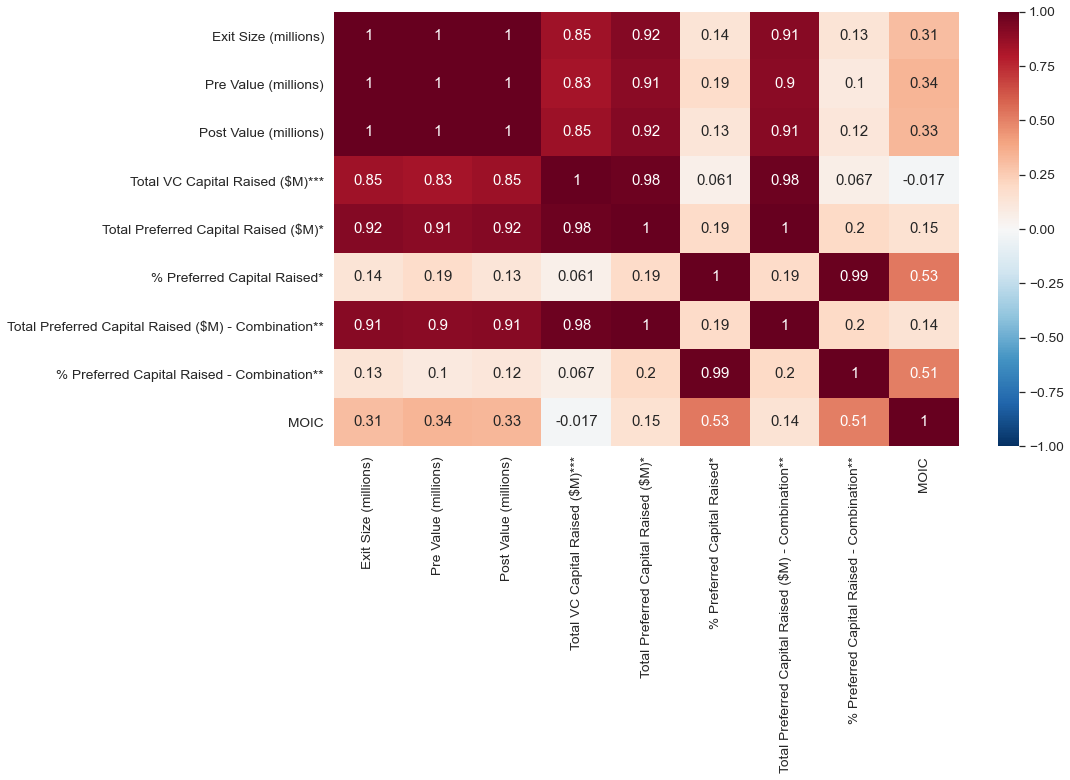

In [28]:
# Plot the correlation between many features in VC exists 
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

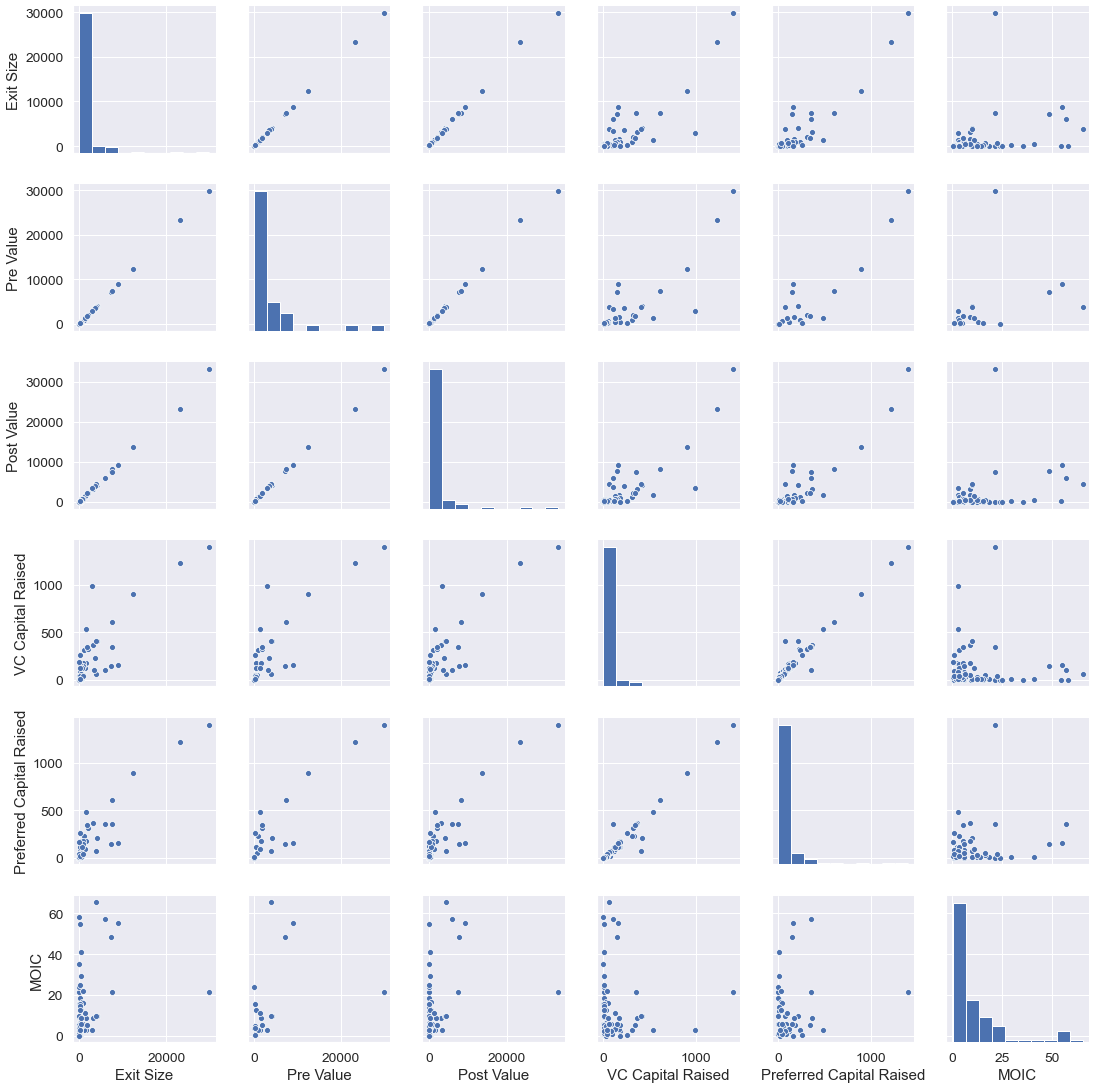

In [42]:
#Scatterplot to check the relationship between Exit size, Pre value, Post value, VC Capital Raised, Preferred Capital Raised and MOIC
sns.pairplot(data = VCexists[['Exit Size','Pre Value','Post Value','VC Capital Raised',
                             'Preferred Capital Raised','MOIC']])

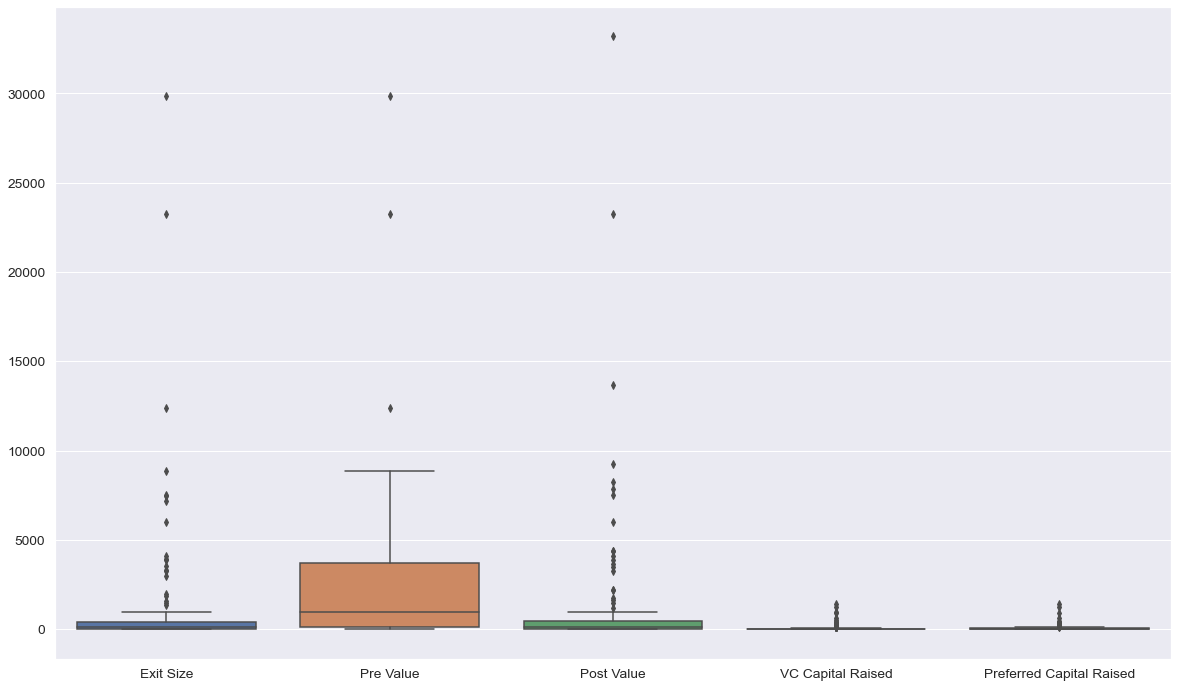

In [41]:
# Boxplot of VC exists
sns.boxplot(data = VCexists[['Exit Size','Pre Value','Post Value','VC Capital Raised','Preferred Capital Raised']])

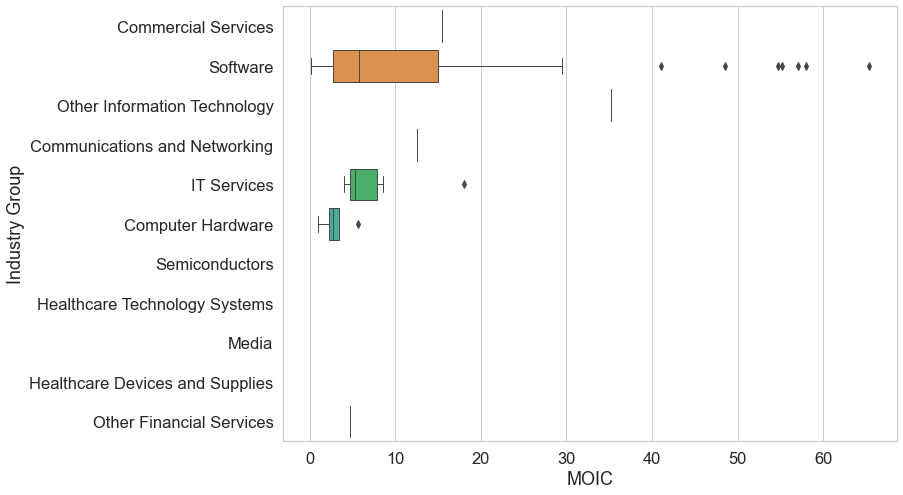

In [301]:
# Relationship of MOIC & Industry Group
sns.boxplot(x="MOIC", y="Industry Group", data=VCexists, linewidth=1)

In [325]:
# Top 5 cities got funding
VCexists['City'].value_counts()[0:5]

San Francisco    54
San Jose         12
Santa Clara      12
New York         10
Seattle          10
Name: City, dtype: int64

In [326]:
# Top 5 countried got funding
VCexists['Country'].value_counts()[0:5]

United States     226
China              24
United Kingdom     20
Israel              9
Japan               7
Name: Country, dtype: int64

In [324]:
# Top 5 verticals got funding
VCexists['Verticals'].value_counts()[0:5]

SaaS, TMT, CloudTech & DevOps            81
TMT, CloudTech & DevOps                  50
Mobile, TMT, CloudTech & DevOps          26
SaaS, Mobile, TMT, CloudTech & DevOps    25
SaaS, CloudTech & DevOps                 21
Name: Verticals, dtype: int64

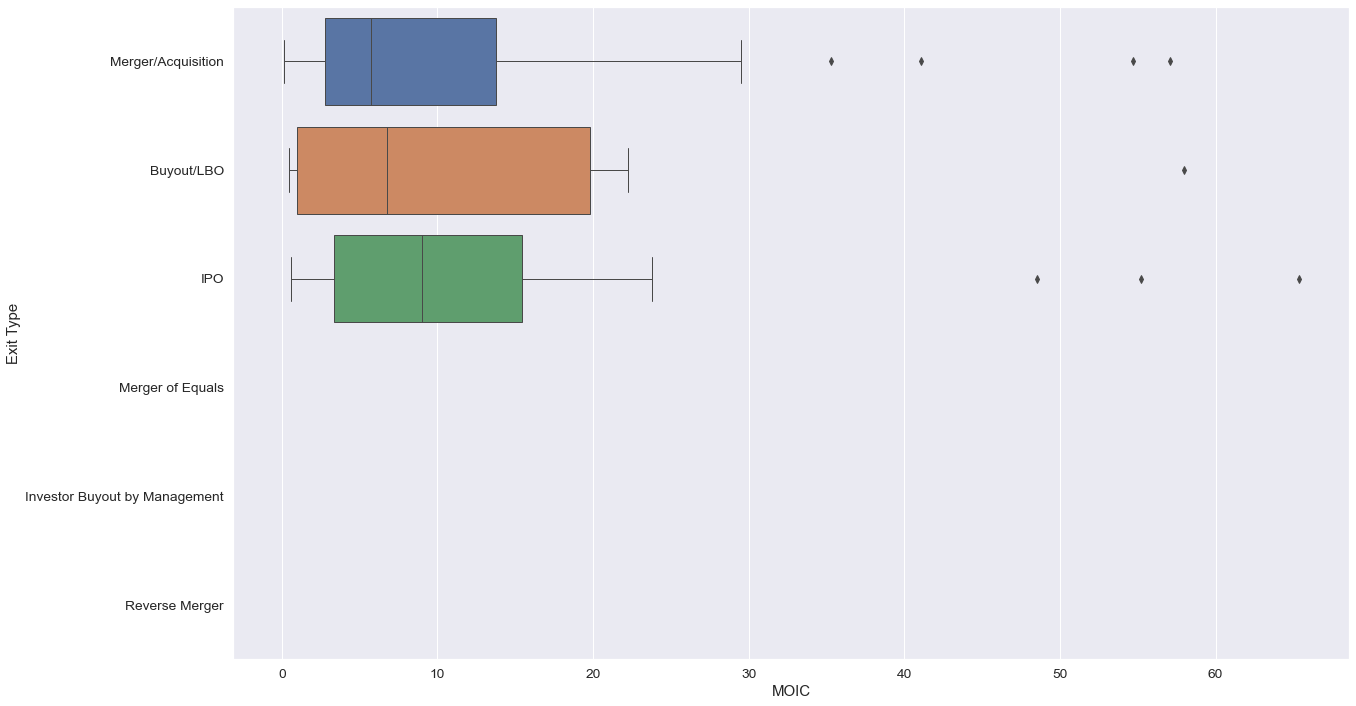

In [43]:
# Relationship between Exit Type and MOIC
sns.boxplot(y="Exit Type", x="MOIC", data=VCexists, linewidth=1)

## DevOps


In [535]:
Devops.head()

Deal ID Company PBID Primary Industry Sector Primary Industry Group  \
0  112200-58T    233268-04  Information Technology               Software   
1   51928-21T     81702-55  Information Technology               Software   
2  118405-99T    161968-06  Information Technology               Software   
3  126936-91T    161968-06  Information Technology               Software   
4   72284-32T    161968-06  Information Technology               Software   

            Primary Industry Code  \
0  Business/Productivity Software   
1  Business/Productivity Software   
2          Communication Software   
3          Communication Software   
4          Communication Software   

                                      All Industries  \
0                    Business/Productivity Software*   
1  Business/Productivity Software*, Information S...   
2  Business/Productivity Software, Communication ...   
3  Business/Productivity Software, Communication ...   
4  Business/Productivity Software, Communication ...   

                                           Verticals  \
0                           CloudTech & DevOps, SaaS   
1                      CloudTech & DevOps, SaaS, TMT   
2  Augmented Reality, CloudTech & DevOps, Mobile,...   
3  Augmented Reality, CloudTech & DevOps, Mobile,...   
4  Augmented Reality, CloudTech & DevOps, Mobile,...   

                                            Keywords Current Financing Status  \
0  data analytics, data analytics platform, data ...    Formerly Angel backed   
1  generation forming, online forming, online sur...   Venture Capital-Backed   
2  augmented reality app, broadcast content, holo...             Angel-Backed   
3  augmented reality app, broadcast content, holo...             Angel-Backed   
4  augmented reality app, broadcast content, holo...             Angel-Backed   

  Current Business Status  ... Current Employees Native Currency of Deal  \
0         Out of Business  ...               NaN        US Dollars (USD)   
1      Generating Revenue  ...             125.0        US Dollars (USD)   
2      Generating Revenue  ...               NaN    British Pounds (GBP)   
3      Generating Revenue  ...               NaN    British Pounds (GBP)   
4      Generating Revenue  ...               NaN    British Pounds (GBP)   

            HQ Location  HQ Global Region HQ Global Sub Region Company City  \
0          Portland, OR          Americas        North America     Portland   
1    Timisoara, Romania            Europe       Eastern Europe    Timisoara   
2  York, United Kingdom            Europe       Western Europe         York   
3  York, United Kingdom            Europe       Western Europe         York   
4  York, United Kingdom            Europe       Western Europe         York   

  Company State/Province  Company Post Code Company Country  Year Founded  
0                 Oregon              97229   United States        2017.0  
1                    NaN             300195         Romania        2008.0  
2                England           YO10 5GA  United Kingdom        2012.0  
3                England           YO10 5GA  United Kingdom        2012.0  
4                England           YO10 5GA  United Kingdom        2012.0  

[5 rows x 85 columns]

In [456]:
Devops.shape

(2183, 85)

Devops data contains 2183 records and 85 variables

In [458]:
#You can look at summary of numerical fields by using describe() function
Devops.describe()

Deal No.    Deal Size  Pre-money Valuation  Post Valuation  \
count  2183.000000  1669.000000           908.000000      916.000000   
mean      3.083830    17.205998           225.972610      257.138319   
std       2.109259    47.953328           819.069351      869.212922   
min       1.000000     0.010000             0.020000        0.110000   
25%       1.000000     0.810000             5.997500        8.000000   
50%       3.000000     3.390000            20.000000       27.605000   
75%       4.000000    14.000000            89.872500      115.465000   
max      16.000000   720.000000         11921.200000    12400.000000   

       % Acquired  Raised to Date  Price per Share  Total Invested Equity  \
count  870.000000     1859.000000       763.000000            1527.000000   
mean    20.965345       36.711237        57.287366              18.202960   
std     12.583885      108.795531       489.988212              48.747774   
min      0.300000        0.000000         0.010000               0.010000   
25%     10.172500        1.340000         0.900000               1.100000   
50%     20.000000        5.360000         2.550000               4.000000   
75%     28.345000       24.565000         8.245000              15.000000   
max     85.150000     1401.760000     11096.580000             720.000000   

       Debt Type 3  Debt Amount 1  ...  Debt/EBITDA  Debt/Equity  \
count          0.0     108.000000  ...     3.000000    55.000000   
mean           NaN       5.407685  ...    -1.883333     0.888727   
std            NaN      20.277105  ...     0.889288     1.416353   
min            NaN       0.010000  ...    -2.900000     0.000000   
25%            NaN       0.250000  ...    -2.200000     0.105000   
50%            NaN       1.270000  ...    -1.500000     0.270000   
75%            NaN       3.260000  ...    -1.375000     1.005000   
max            NaN     200.000000  ...    -1.250000     5.000000   

       Implied EV/EBITDA  Implied EV/EBIT  Implied EV/Net Income  \
count                0.0              0.0                    0.0   
mean                 NaN              NaN                    NaN   
std                  NaN              NaN                    NaN   
min                  NaN              NaN                    NaN   
25%                  NaN              NaN                    NaN   
50%                  NaN              NaN                    NaN   
75%                  NaN              NaN                    NaN   
max                  NaN              NaN                    NaN   

       Implied EV/Revenue  Implied EV/Cash Flow  EBITDA Margin %  \
count                 0.0                   0.0        73.000000   
mean                  NaN                   NaN      -362.993699   
std                   NaN                   NaN      1239.078014   
min                   NaN                   NaN     -6531.730000   
25%                   NaN                   NaN       -90.530000   
50%                   NaN                   NaN       -27.980000   
75%                   NaN                   NaN         4.310000   
max                   NaN                   NaN        63.930000   

       Current Employees  Year Founded  
count        1752.000000   2146.000000  
mean          228.074772   2012.865797  
std           592.588970      4.303809  
min             1.000000   1979.000000  
25%            14.000000   2011.000000  
50%            40.000000   2014.000000  
75%           127.500000   2016.000000  
max          6160.000000   2020.000000  

[8 rows x 47 columns]

In [459]:
Devops.describe(include=[object])

Deal ID Company PBID Primary Industry Sector  \
count         2183         2183                    2183   
unique        2183         1000                       5   
top     108954-55T     52323-40  Information Technology   
freq             1           11                    2022   

       Primary Industry Group           Primary Industry Code  \
count                    2183                            2183   
unique                     15                              53   
top                  Software  Business/Productivity Software   
freq                     1719                             720   

                         All Industries                      Verticals  \
count                              2183                           2174   
unique                              415                            246   
top     Business/Productivity Software*  CloudTech & DevOps, SaaS, TMT   
freq                                170                            374   

                                                 Keywords  \
count                                                2183   
unique                                               1000   
top     behavior change program, health software, heal...   
freq                                                   11   

       Current Financing Status Current Business Status  ...  \
count                      2183                    2183  ...   
unique                       12                      10  ...   
top      Venture Capital-Backed      Generating Revenue  ...   
freq                       1604                    1864  ...   

           Business Status        Financing Status Native Currency of Deal  \
count                 2183                    2181                    2183   
unique                   7                       9                      28   
top     Generating Revenue  Venture Capital-Backed        US Dollars (USD)   
freq                  1651                    1781                    1510   

              HQ Location HQ Global Region HQ Global Sub Region  \
count                2183             2183                 2183   
unique                334                6                   12   
top     San Francisco, CA         Americas        North America   
freq                  291             1289                 1279   

         Company City Company State/Province Company Post Code Company Country  
count            2182                   1603              1839            2183  
unique            328                     79               575              48  
top     San Francisco             California             94105   United States  
freq              291                    667                67            1238  

[4 rows x 36 columns]

## Data Cleaning

In [50]:
# Checking Null values
Devops.isnull().sum()

Deal ID                      0
Company PBID                 0
Primary Industry Sector      0
Primary Industry Group       0
Primary Industry Code        0
                          ... 
Company City                 1
Company State/Province     580
Company Post Code          344
Company Country              0
Year Founded                37
Length: 85, dtype: int64

In [460]:
#Checking the summary of numerical fields by using describe() function
Devops.describe()

Deal No.    Deal Size  Pre-money Valuation  Post Valuation  \
count  2183.000000  1669.000000           908.000000      916.000000   
mean      3.083830    17.205998           225.972610      257.138319   
std       2.109259    47.953328           819.069351      869.212922   
min       1.000000     0.010000             0.020000        0.110000   
25%       1.000000     0.810000             5.997500        8.000000   
50%       3.000000     3.390000            20.000000       27.605000   
75%       4.000000    14.000000            89.872500      115.465000   
max      16.000000   720.000000         11921.200000    12400.000000   

       % Acquired  Raised to Date  Price per Share  Total Invested Equity  \
count  870.000000     1859.000000       763.000000            1527.000000   
mean    20.965345       36.711237        57.287366              18.202960   
std     12.583885      108.795531       489.988212              48.747774   
min      0.300000        0.000000         0.010000               0.010000   
25%     10.172500        1.340000         0.900000               1.100000   
50%     20.000000        5.360000         2.550000               4.000000   
75%     28.345000       24.565000         8.245000              15.000000   
max     85.150000     1401.760000     11096.580000             720.000000   

       Debt Type 3  Debt Amount 1  ...  Debt/EBITDA  Debt/Equity  \
count          0.0     108.000000  ...     3.000000    55.000000   
mean           NaN       5.407685  ...    -1.883333     0.888727   
std            NaN      20.277105  ...     0.889288     1.416353   
min            NaN       0.010000  ...    -2.900000     0.000000   
25%            NaN       0.250000  ...    -2.200000     0.105000   
50%            NaN       1.270000  ...    -1.500000     0.270000   
75%            NaN       3.260000  ...    -1.375000     1.005000   
max            NaN     200.000000  ...    -1.250000     5.000000   

       Implied EV/EBITDA  Implied EV/EBIT  Implied EV/Net Income  \
count                0.0              0.0                    0.0   
mean                 NaN              NaN                    NaN   
std                  NaN              NaN                    NaN   
min                  NaN              NaN                    NaN   
25%                  NaN              NaN                    NaN   
50%                  NaN              NaN                    NaN   
75%                  NaN              NaN                    NaN   
max                  NaN              NaN                    NaN   

       Implied EV/Revenue  Implied EV/Cash Flow  EBITDA Margin %  \
count                 0.0                   0.0        73.000000   
mean                  NaN                   NaN      -362.993699   
std                   NaN                   NaN      1239.078014   
min                   NaN                   NaN     -6531.730000   
25%                   NaN                   NaN       -90.530000   
50%                   NaN                   NaN       -27.980000   
75%                   NaN                   NaN         4.310000   
max                   NaN                   NaN        63.930000   

       Current Employees  Year Founded  
count        1752.000000   2146.000000  
mean          228.074772   2012.865797  
std           592.588970      4.303809  
min             1.000000   1979.000000  
25%            14.000000   2011.000000  
50%            40.000000   2014.000000  
75%           127.500000   2016.000000  
max          6160.000000   2020.000000  

[8 rows x 47 columns]

In [85]:
Devops.describe(include=[object])

Deal ID Company ID Primary Industry Sector Primary Industry Group  \
count         2183       2183                    2183                   2183   
unique        2183       1000                       5                     15   
top     106441-30T   52323-40  Information Technology               Software   
freq             1         11                    2022                   1719   

                 Primary Industry Code                   All Industries  \
count                             2183                             2183   
unique                              53                              415   
top     Business/Productivity Software  Business/Productivity Software*   
freq                               720                              170   

                            Verticals  \
count                            2174   
unique                            246   
top     CloudTech & DevOps, SaaS, TMT   
freq                              374   

                                                 Keywords  \
count                                                2183   
unique                                               1000   
top     behavior change program, health software, heal...   
freq                                                   11   

       Current Financing Status Current Business Status  ...  \
count                      2183                    2183  ...   
unique                       12                      10  ...   
top      Venture Capital-Backed      Generating Revenue  ...   
freq                       1604                    1864  ...   

           Business Status        Financing Status Native Currency of Deal  \
count                 2183                    2181                    2183   
unique                   7                       9                      28   
top     Generating Revenue  Venture Capital-Backed        US Dollars (USD)   
freq                  1651                    1781                    1510   

              HQ Location HQ Global Region HQ Global Sub Region  \
count                2183             2183                 2183   
unique                334                6                   12   
top     San Francisco, CA         Americas        North America   
freq                  291             1289                 1279   

         Company City Company State/Province Company Post Code Company Country  
count            2182                   1603              1839            2183  
unique            328                     79               575              48  
top     San Francisco             California             94105   United States  
freq              291                    667                67            1238  

[4 rows x 36 columns]

In [14]:
Devops.rename(columns={'Company ID': 'Company PBID', 'Total Debt (from financials)': 'Total Debt'},
               inplace=True)

## EDA
### Correlation

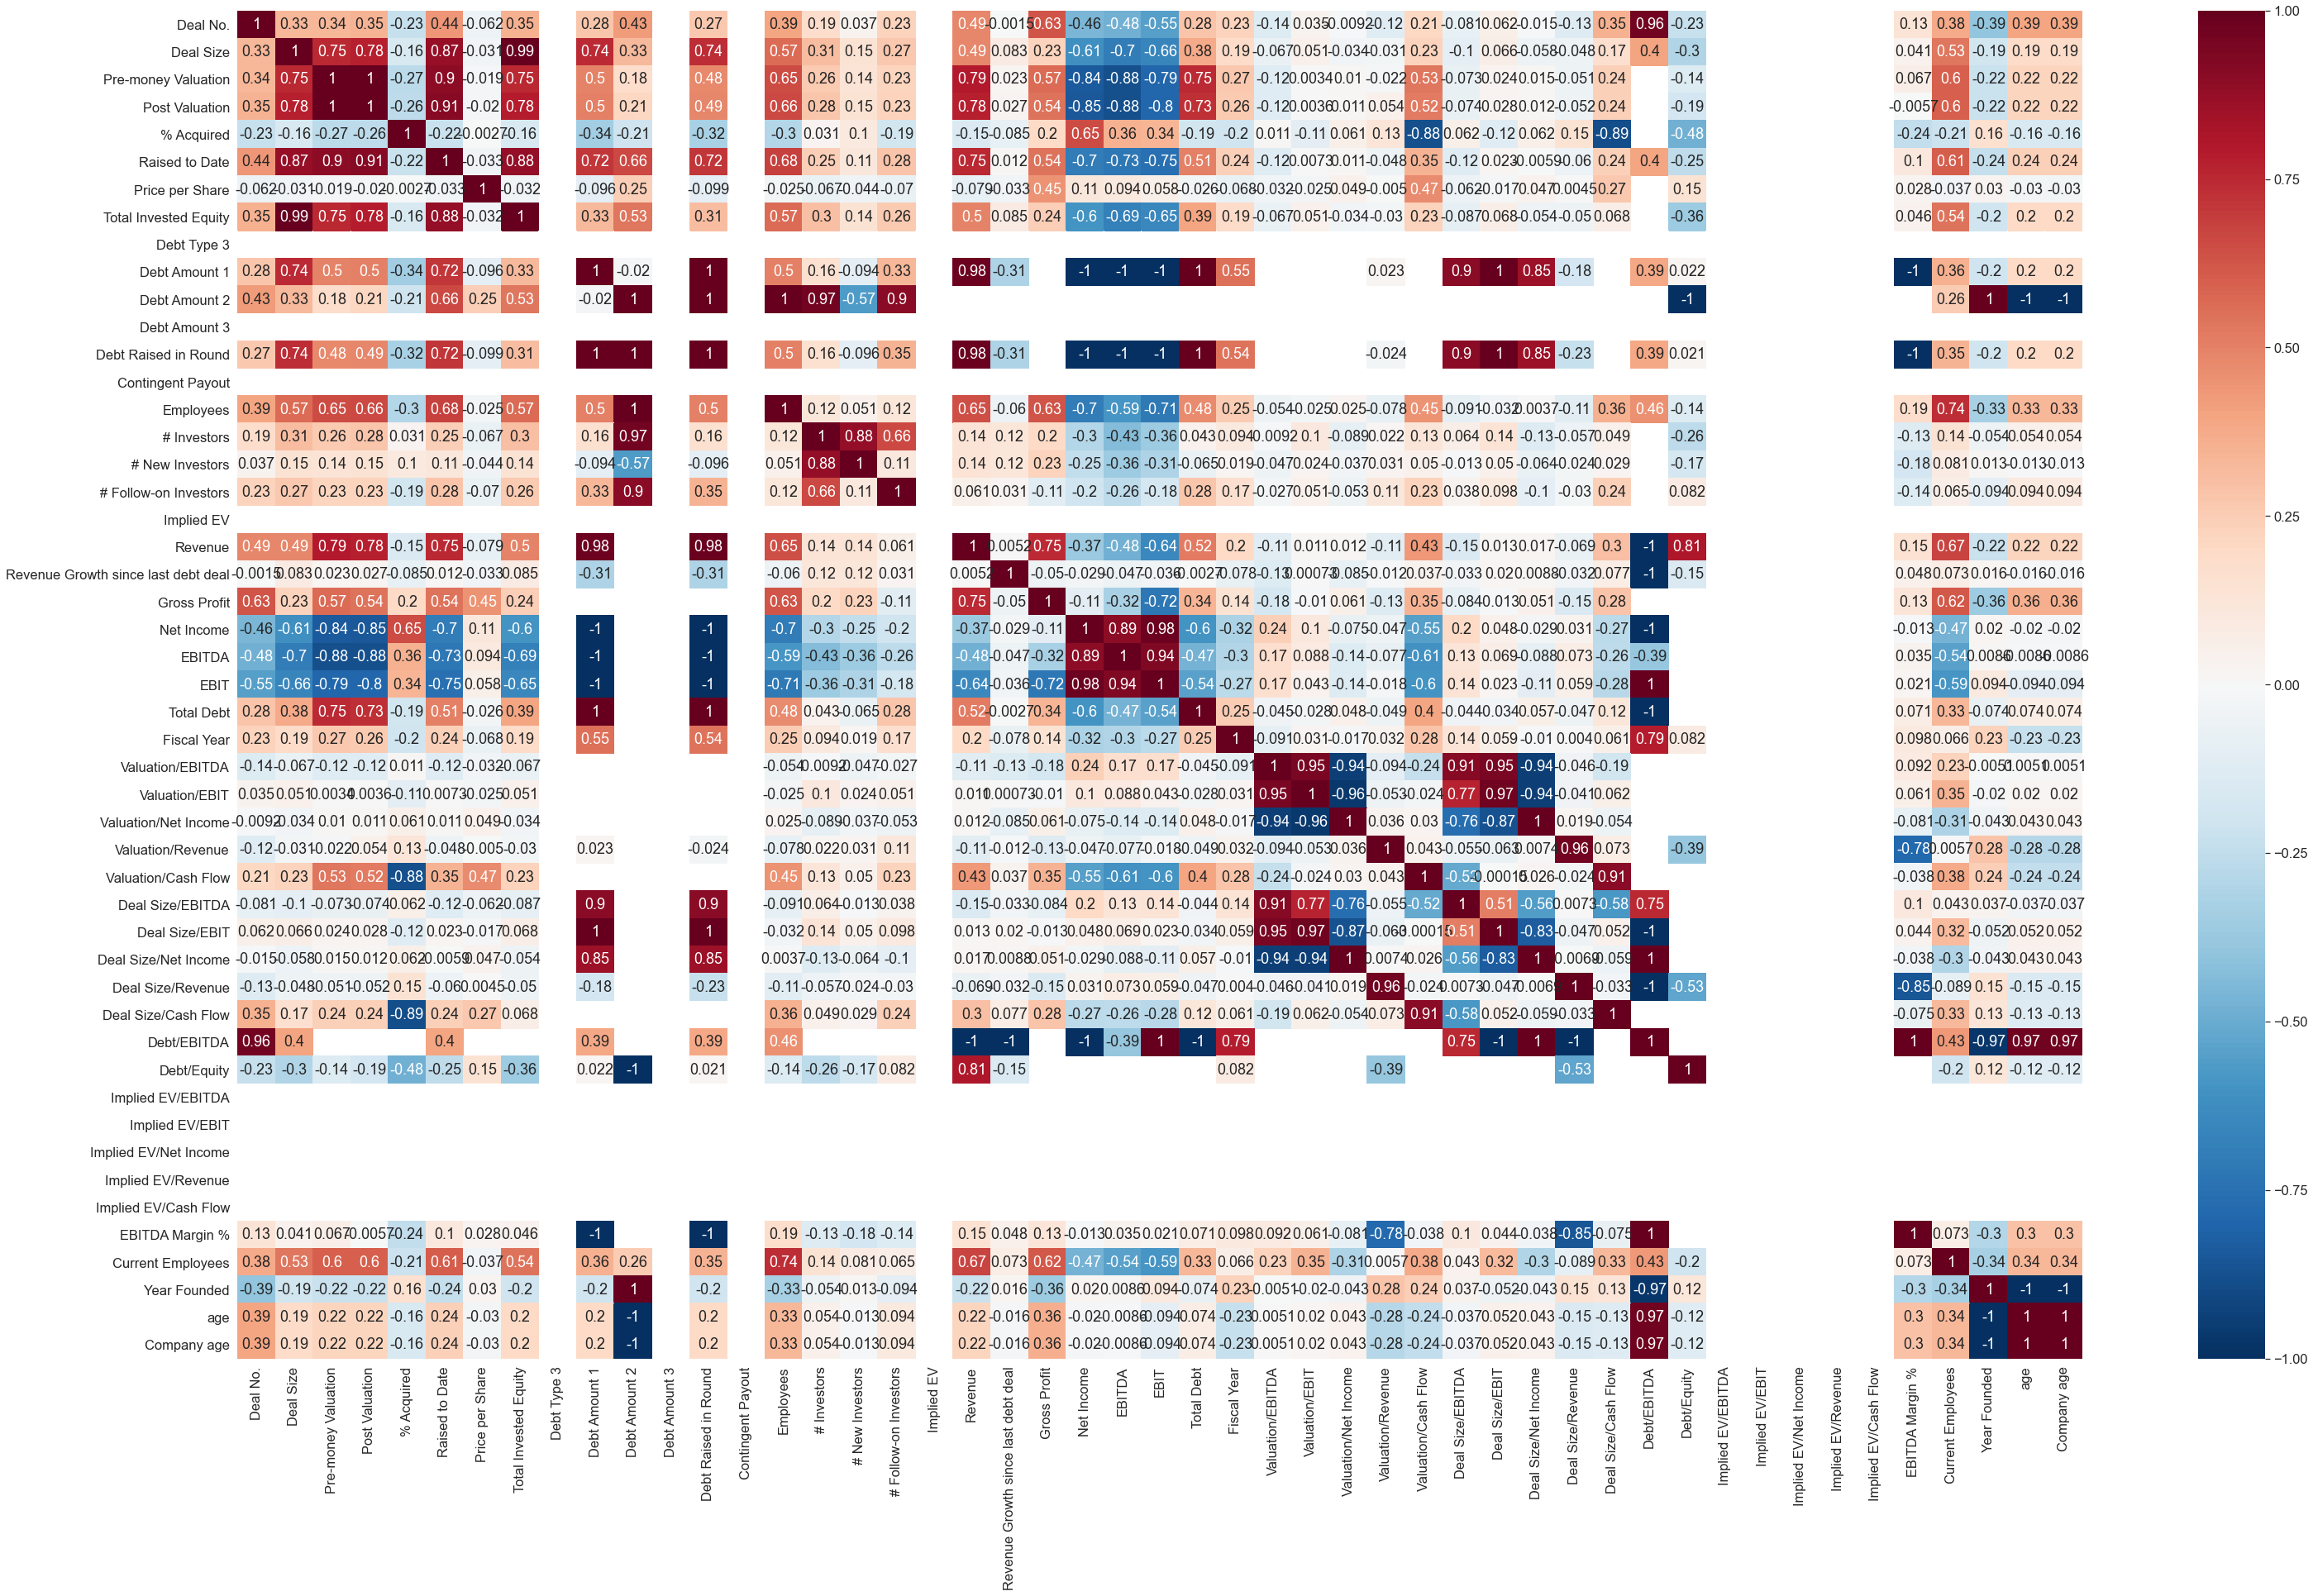

In [395]:
correlation = Devops.corr()
plt.figure(figsize=(50, 30))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

There are many features that have no corellation or no valuable for further analysis so we will drop those features and create a new dataframe as below:

In [356]:
# Create a new data frame from Devops dataset
df = pd.DataFrame(Devops)

In [340]:
# Dropping no valuable values for further analysis
df1=df.drop(['Debt Type 3','Debt Amount 1','Debt Amount 2','Debt Amount 3','Contingent Payout',
                  'Implied EV','Debt/EBITDA','Implied EV/EBITDA','Implied EV/EBIT','Implied EV/Revenue',
                  'Implied EV/Cash Flow','Implied EV/Net Income'],axis = 1)

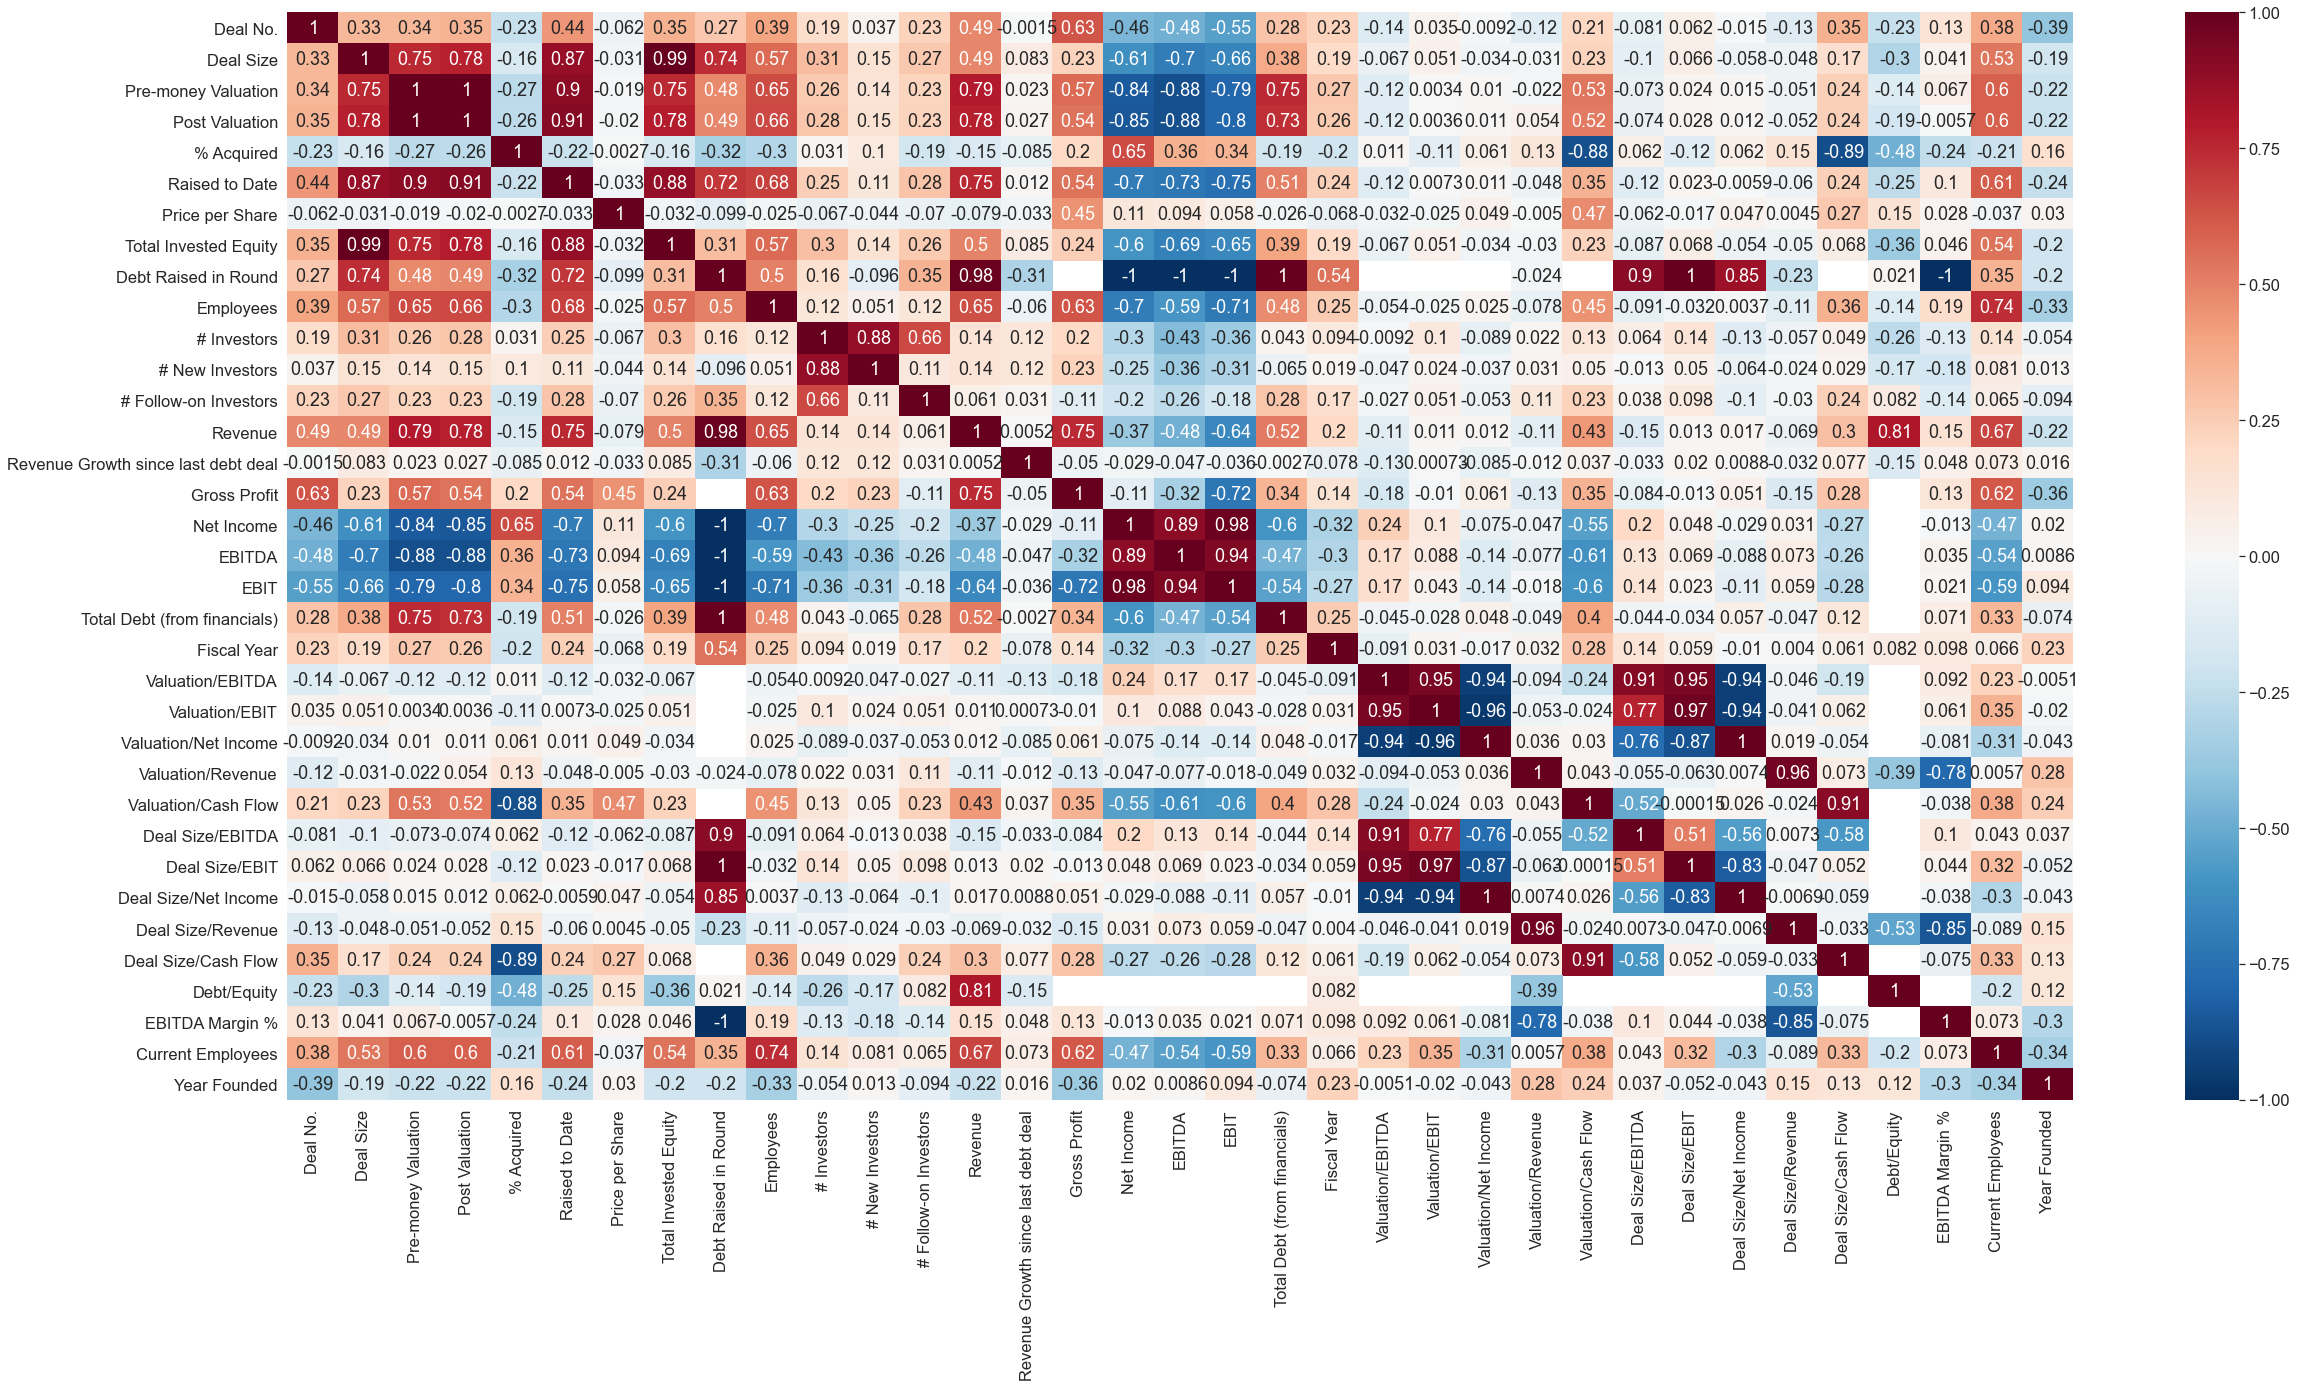

In [348]:
# Plot the heat map correlation to see the relationship between features after cleaning 
correlation = df1.corr()
plt.figure(figsize=(40,20))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

#### Create Company Age Variable

In [478]:
# Calculate company age based on Year Founded variables
# Companies with NA in Year Founded column will replaced with 2021, Age will be 0
Devops['Year Founded'] = Devops['Year Founded'].astype('Int64')
Devops['Company age'] = Devops['Year Founded'].sub(2021, fill_value= 2021)
Devops['Company age'] = Devops['Company age'].astype(int).abs() 

In [479]:
Devops.head()

Deal ID Company PBID Primary Industry Sector Primary Industry Group  \
0  112200-58T    233268-04  Information Technology               Software   
1   51928-21T     81702-55  Information Technology               Software   
2  118405-99T    161968-06  Information Technology               Software   
3  126936-91T    161968-06  Information Technology               Software   
4   72284-32T    161968-06  Information Technology               Software   

            Primary Industry Code  \
0  Business/Productivity Software   
1  Business/Productivity Software   
2          Communication Software   
3          Communication Software   
4          Communication Software   

                                      All Industries  \
0                    Business/Productivity Software*   
1  Business/Productivity Software*, Information S...   
2  Business/Productivity Software, Communication ...   
3  Business/Productivity Software, Communication ...   
4  Business/Productivity Software, Communication ...   

                                           Verticals  \
0                           CloudTech & DevOps, SaaS   
1                      CloudTech & DevOps, SaaS, TMT   
2  Augmented Reality, CloudTech & DevOps, Mobile,...   
3  Augmented Reality, CloudTech & DevOps, Mobile,...   
4  Augmented Reality, CloudTech & DevOps, Mobile,...   

                                            Keywords Current Financing Status  \
0  data analytics, data analytics platform, data ...    Formerly Angel backed   
1  generation forming, online forming, online sur...   Venture Capital-Backed   
2  augmented reality app, broadcast content, holo...             Angel-Backed   
3  augmented reality app, broadcast content, holo...             Angel-Backed   
4  augmented reality app, broadcast content, holo...             Angel-Backed   

  Current Business Status  ... Native Currency of Deal           HQ Location  \
0         Out of Business  ...        US Dollars (USD)          Portland, OR   
1      Generating Revenue  ...        US Dollars (USD)    Timisoara, Romania   
2      Generating Revenue  ...    British Pounds (GBP)  York, United Kingdom   
3      Generating Revenue  ...    British Pounds (GBP)  York, United Kingdom   
4      Generating Revenue  ...    British Pounds (GBP)  York, United Kingdom   

  HQ Global Region  HQ Global Sub Region Company City Company State/Province  \
0         Americas         North America     Portland                 Oregon   
1           Europe        Eastern Europe    Timisoara                    NaN   
2           Europe        Western Europe         York                England   
3           Europe        Western Europe         York                England   
4           Europe        Western Europe         York                England   

  Company Post Code  Company Country Year Founded  Company age  
0             97229    United States         2017            4  
1            300195          Romania         2008           13  
2          YO10 5GA   United Kingdom         2012            9  
3          YO10 5GA   United Kingdom         2012            9  
4          YO10 5GA   United Kingdom         2012            9  

[5 rows x 86 columns]

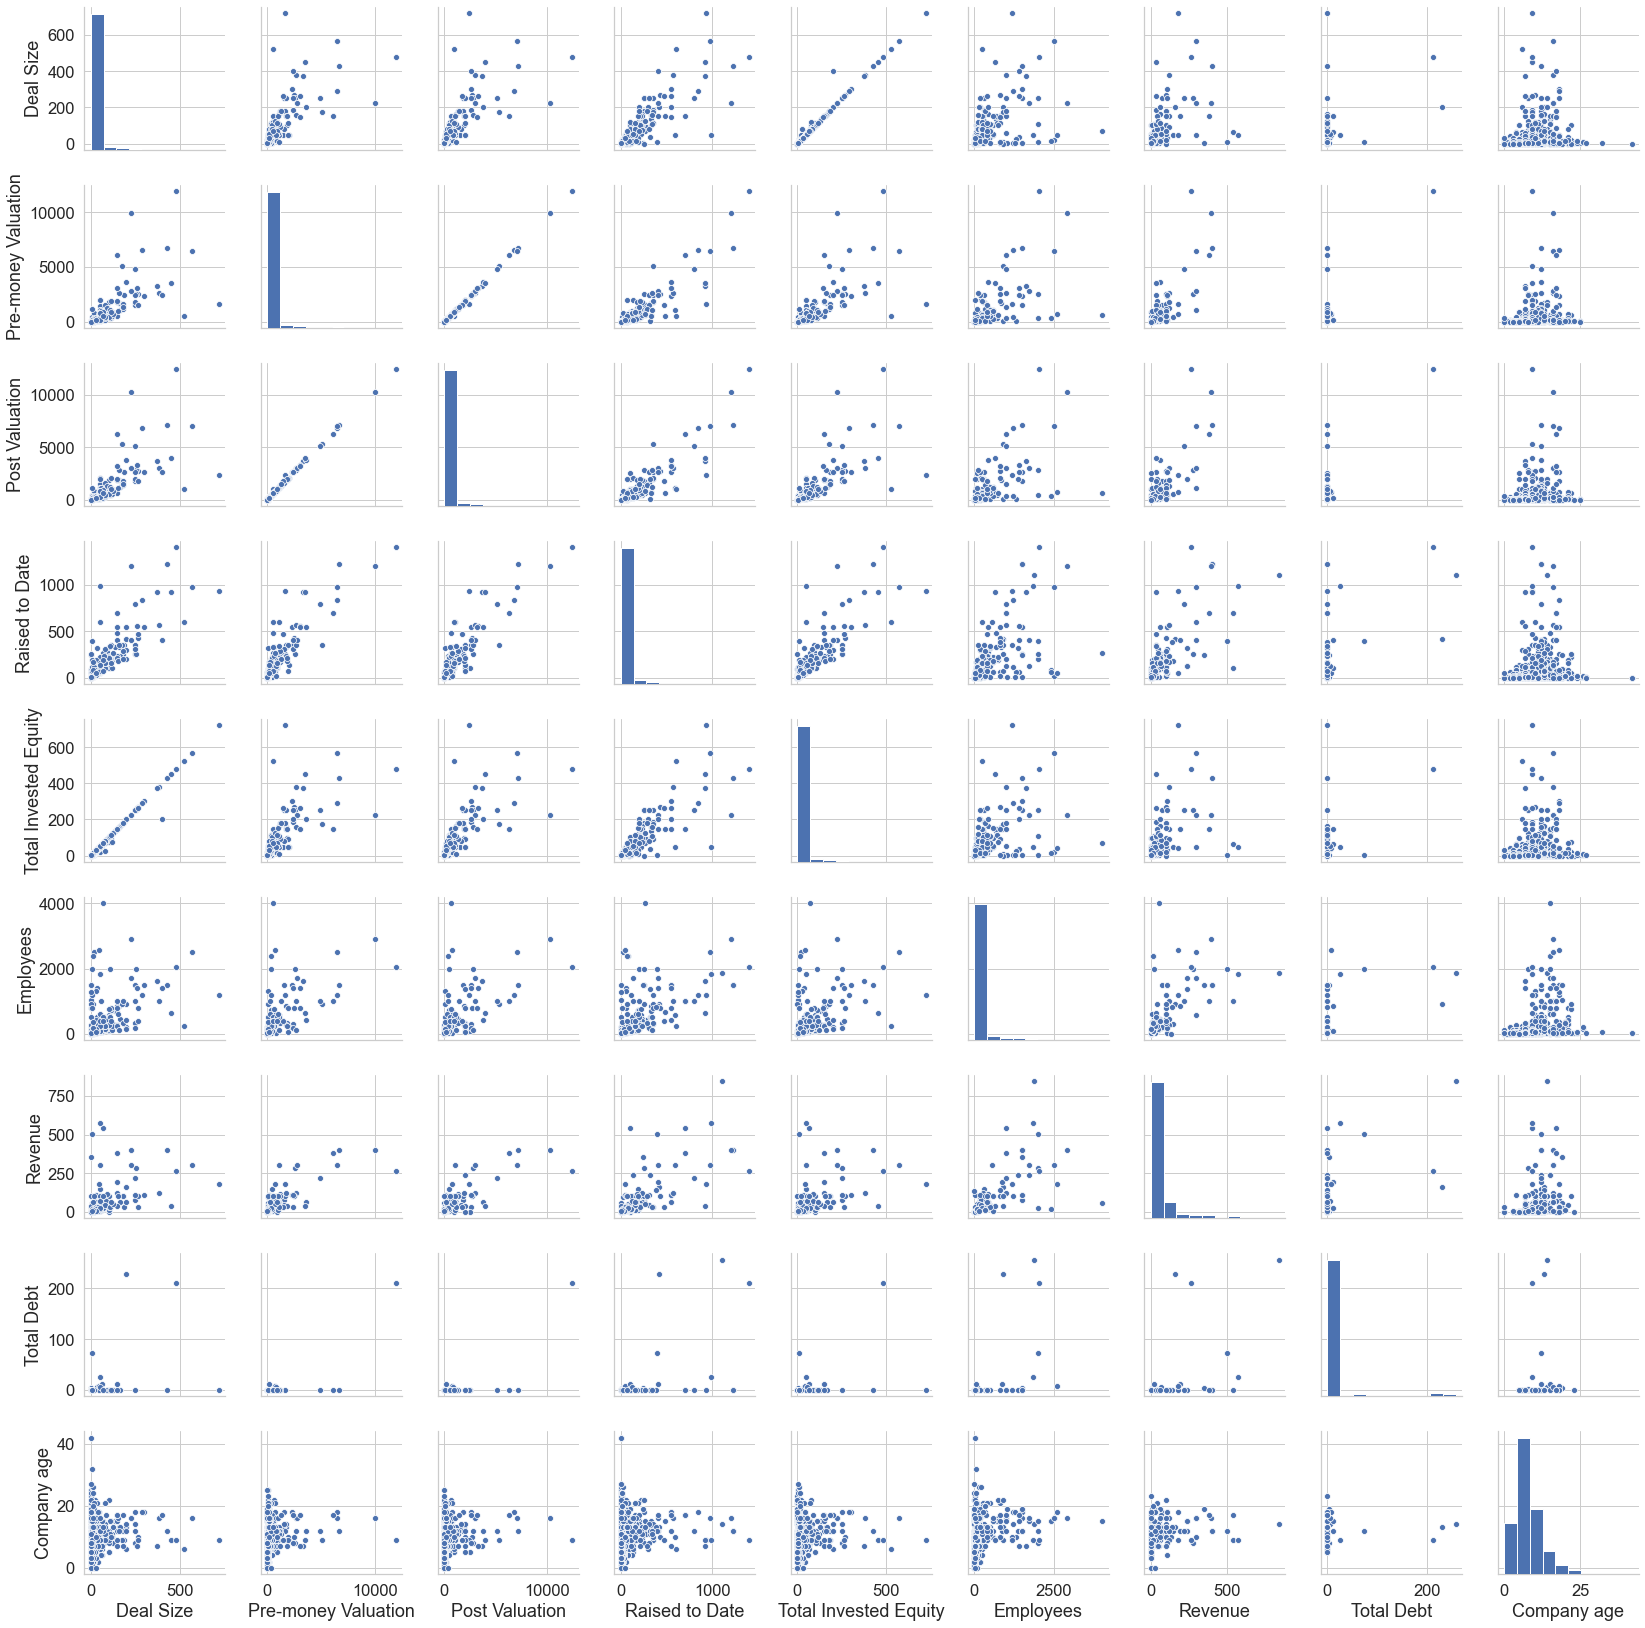

In [480]:
# Scatter Plot of feature in Devops
sns.pairplot(data = Devops[['Deal Size','Pre-money Valuation','Post Valuation','Raised to Date','Total Invested Equity',
                            'Employees','Revenue',
                            'Total Debt','Company age']])

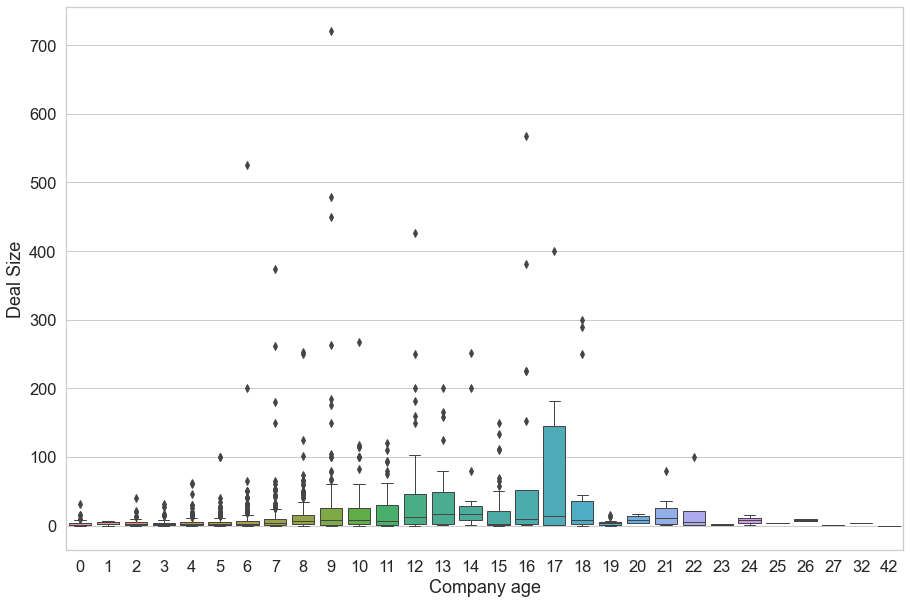

In [481]:
# Relationship of Company age & Deal size
sns.set(style="whitegrid",rc={'figure.figsize':(15,10)},font_scale=1.5)
sns.boxplot(x="Company age", y="Deal Size", data=Devops, linewidth=1)

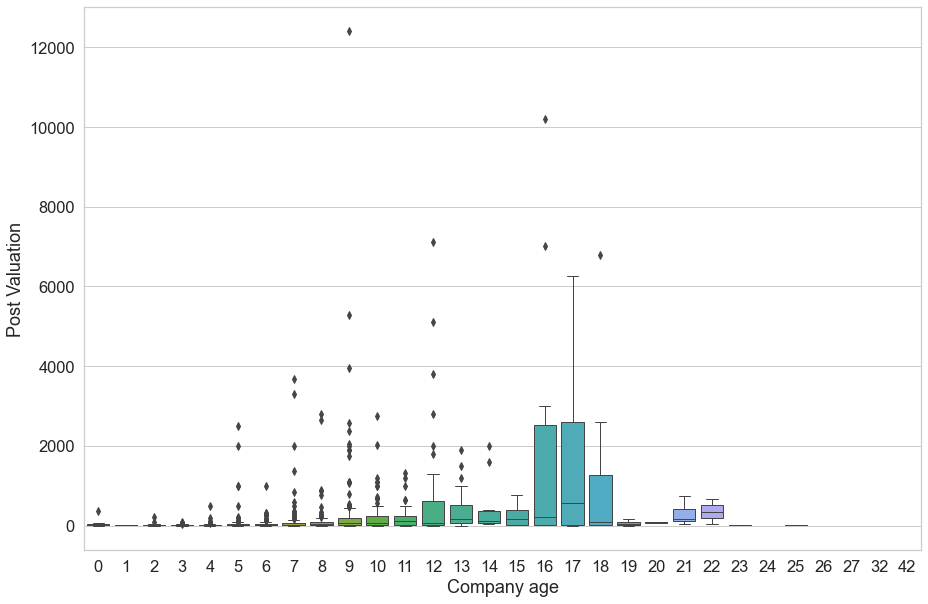

In [482]:
sns.boxplot(x="Company age", y="Post Valuation", data=Devops, linewidth=1)

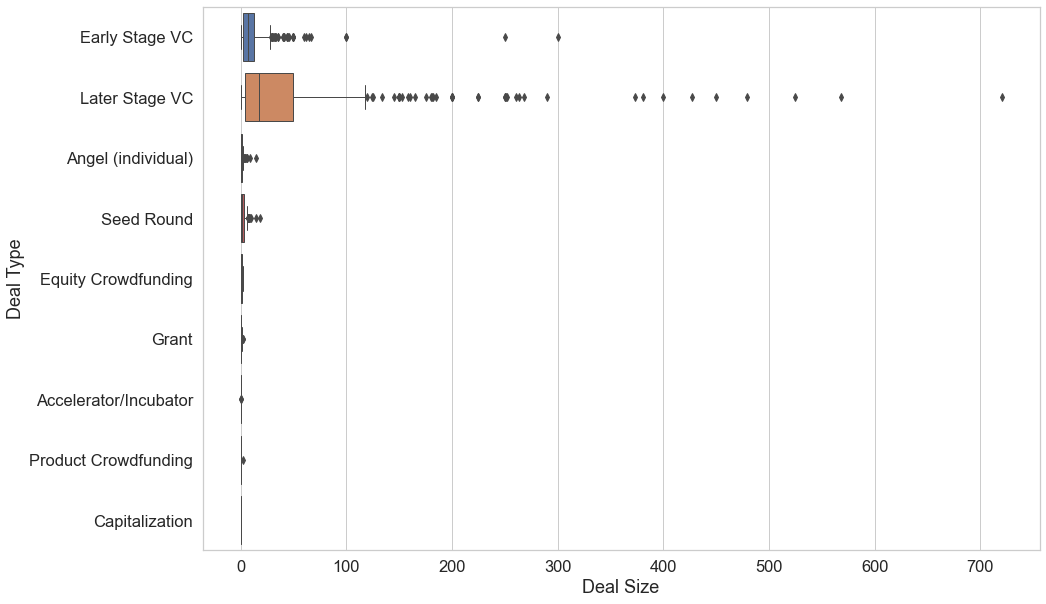

In [498]:
# Relationship between Deal Type and Deal size
sns.boxplot(y="Deal Type", x="Deal Size", data=Devops, linewidth=1)

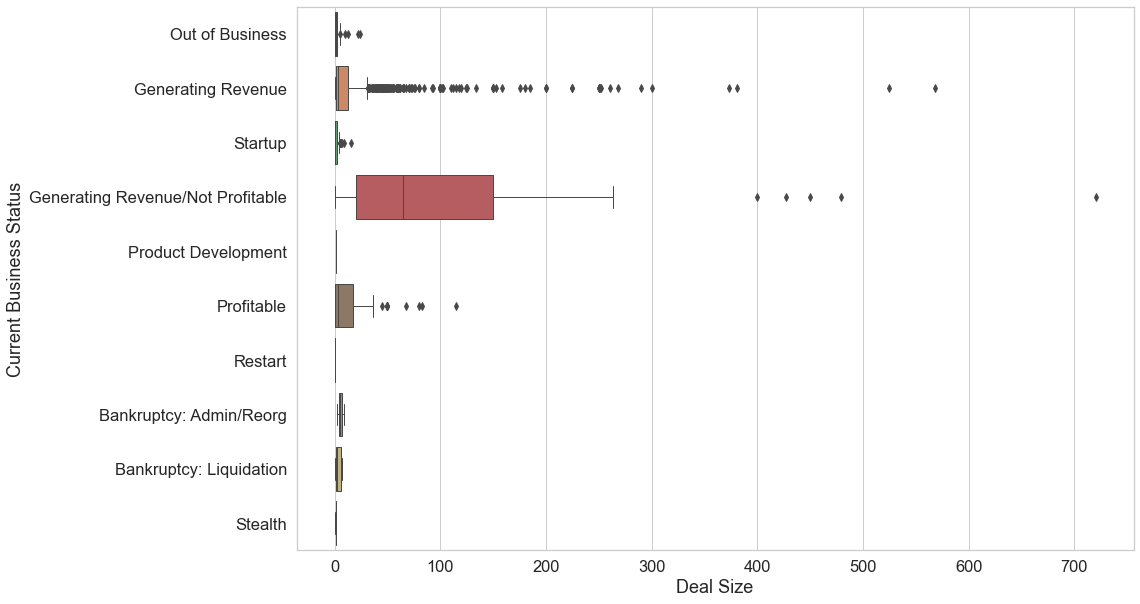

In [533]:
# Relationship between Current Business Status and Deal Size
sns.boxplot(y="Current Business Status", x="Deal Size", data=Devops, linewidth=1)

## Merged Returns and VCexists

In [17]:
merged = pd.merge(Returns, VCexists, 
                        how="inner", on=["Company PBID"])

In [512]:
# Drop null data of TotalCharges
merged.dropna(axis = 0, inplace = True)

# Check the number of missing values.
merged.isnull().sum().max()

0

In [509]:
merged

Company PBID Exit Date_x Exit Type_x VC Round Stock Type   Payout  \
10     53557-21  2015-04-24         IPO            Series A  32.9788   
11     53557-21  2015-04-24         IPO            Series B  30.6089   
12     53557-21  2015-04-24         IPO            Series C  54.4088   
13     53557-21  2015-04-24         IPO            Series D  24.1197   
14     53557-21  2015-04-24         IPO            Series E  21.4475   

    Return %  Return MOIC  VC Deal Size VC Round Close Date  \
10  1.767260      2.76726     11.917500          2005-05-01   
11  0.913058      1.91306     16.000011          2006-10-01   
12  2.860290      3.86029     14.094494          2010-02-19   
13  2.710730      3.71073      6.499998          2010-10-25   
14  2.063930      3.06393      7.000000          2011-12-28   

    Time Since VC Round  ... Preferred Capital Raised Combination  \
10             9.986301  ...                           182.145018   
11             8.567123  ...                           182.145018   
12             5.178082  ...                           182.145018   
13             4.498630  ...                           182.145018   
14             3.323288  ...                           182.145018   

    % Preferred Capital Raised Combination    MOIC         Industry Sector  \
10                                     1.0  2.2374  Information Technology   
11                                     1.0  2.2374  Information Technology   
12                                     1.0  2.2374  Information Technology   
13                                     1.0  2.2374  Information Technology   
14                                     1.0  2.2374  Information Technology   

   Industry Group                      Industry Code                Verticals  \
10       Software  Software Development Applications  TMT, CloudTech & DevOps   
11       Software  Software Development Applications  TMT, CloudTech & DevOps   
12       Software  Software Development Applications  TMT, CloudTech & DevOps   
13       Software  Software Development Applications  TMT, CloudTech & DevOps   
14       Software  Software Development Applications  TMT, CloudTech & DevOps   

        City       State        Country  
10  San Jose  California  United States  
11  San Jose  California  United States  
12  San Jose  California  United States  
13  San Jose  California  United States  
14  San Jose  California  United States  

[5 rows x 29 columns]

In [217]:
merged.shape

(245, 29)

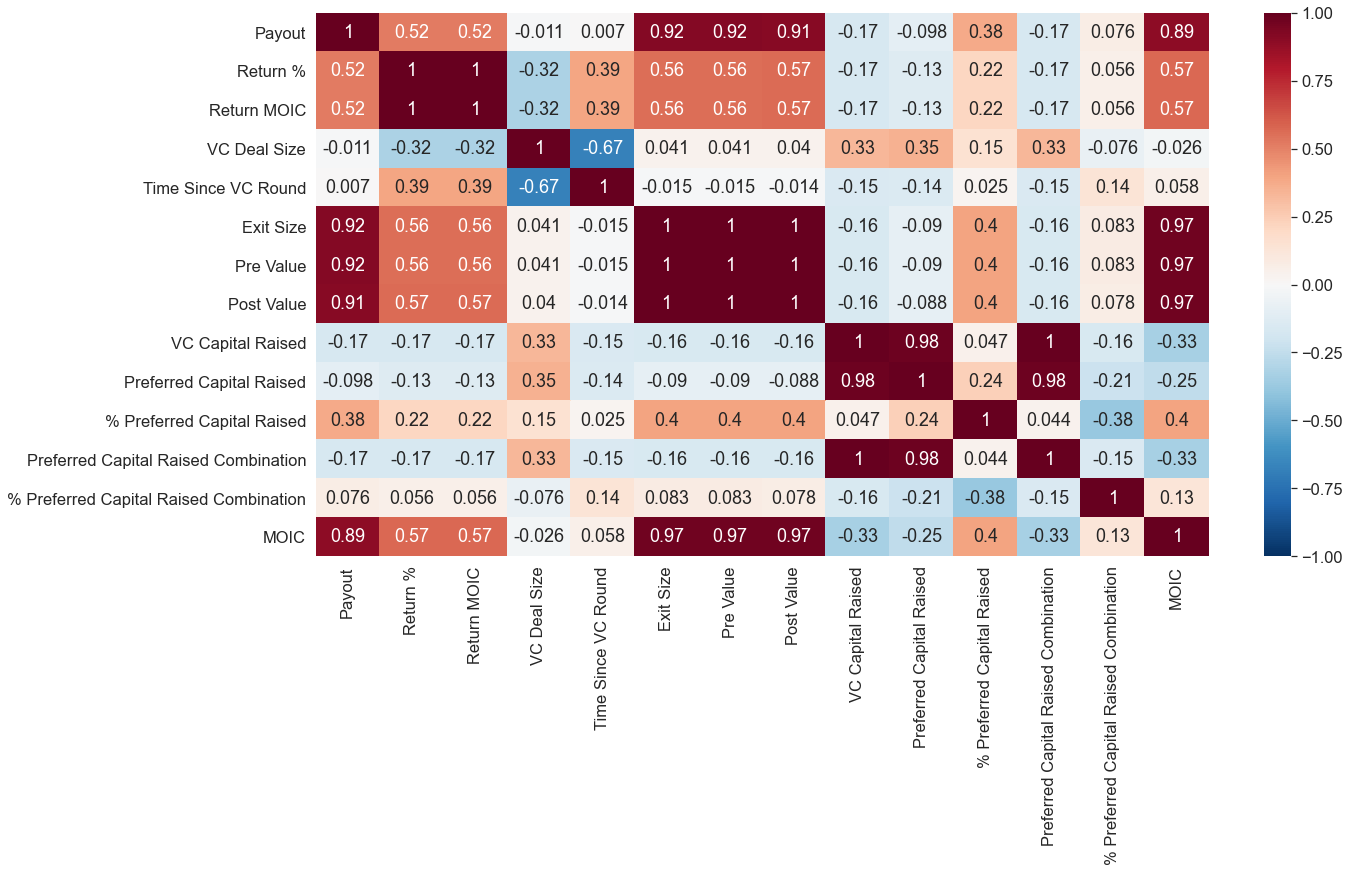

In [504]:
correlation = merged.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [505]:
# Print a dataframe to see how much each variable correlates with Return MOIC.
correlation['MOIC'].sort_values(ascending=False).round(3).head(10).to_frame()

MOIC
MOIC                                    1.000
Post Value                              0.972
Pre Value                               0.972
Exit Size                               0.972
Payout                                  0.894
Return MOIC                             0.572
Return %                                0.572
% Preferred Capital Raised              0.402
% Preferred Capital Raised Combination  0.131
Time Since VC Round                     0.058

In [506]:
# Counts all missing values
total = merged.isnull().sum().sort_values(ascending = False)
frames = [total]

# pd.concat(): axis=0 means index, axis=1 means column, keys = name of the column.
missing_data = pd.concat(frames, axis = 1, keys = ['Total'])
missing_data.head(15)

Total
Country                  0
Post Value               0
Exit Date_x              0
Exit Type_x              0
VC Round Stock Type      0
Payout                   0
Return %                 0
Return MOIC              0
VC Deal Size             0
VC Round Close Date      0
Time Since VC Round      0
Exit Date_y              0
Exit Size                0
Pre Value                0
Exit Type_y              0

In [256]:
ratioMissing = total*100.0/merged.shape[0]
ratioMissing

Pre Value                                 80.816327
MOIC                                      51.428571
Post Value                                46.938776
Exit Size                                 42.448980
Payout                                    42.448980
Return %                                  42.448980
Return MOIC                               42.448980
% Preferred Capital Raised                 1.224490
Preferred Capital Raised                   1.224490
Preferred Capital Raised Combination       0.816327
% Preferred Capital Raised Combination     0.816327
State                                      0.816327
VC Deal Size                               0.000000
Country                                    0.000000
Time Since VC Round                        0.000000
VC Round Stock Type                        0.000000
Exit Type_x                                0.000000
Exit Date_x                                0.000000
VC Round Close Date                        0.000000
Exit Type_y 

## Merged all three datasets

In [ ]:
Returns = pd.read_excel('Returnsbyseries.xlsx')
VCexists = pd.read_excel('VCexists.xlsx')
Devops = pd.read_excel('Devops_data.xlsx')

In [21]:
Devops.rename(columns={'Company ID': 'Company PBID', 'Total Debt (from financials)': 'Total Debt'},
               inplace=True)

In [22]:
mergedall = pd.merge(merged, Devops,
                        how="inner", on=["Company PBID"])

In [23]:
mergedall.head(5)

Company PBID Exit Date_x Exit Type_x VC Round Stock Type  Payout  Return %  \
0     40452-67  2016-11-30  Buyout/LBO            Series A     NaN       NaN   
1     40452-67  2016-11-30  Buyout/LBO            Series B     NaN       NaN   
2     40452-67  2016-11-30  Buyout/LBO            Series C     NaN       NaN   
3     40452-67  2016-11-30  Buyout/LBO            Series D     NaN       NaN   
4     40452-67  2016-11-30  Buyout/LBO            Series E     NaN       NaN   

   Return MOIC  VC Deal Size (millions) VC Round Close Date  \
0          NaN                 7.000001          2002-03-13   
1          NaN                 7.000001          2002-03-13   
2          NaN                11.000000          2006-06-12   
3          NaN                11.000000          2006-06-12   
4          NaN                11.000000          2006-06-12   

   Time Since VC Round  ... Native Currency of Deal      HQ Location  \
0            14.728767  ...        US Dollars (USD)  Minneapolis, MN   
1            14.728767  ...        US Dollars (USD)  Minneapolis, MN   
2            10.476712  ...        US Dollars (USD)  Minneapolis, MN   
3            10.476712  ...        US Dollars (USD)  Minneapolis, MN   
4            10.476712  ...        US Dollars (USD)  Minneapolis, MN   

   HQ Global Region  HQ Global Sub Region Company City Company State/Province  \
0          Americas         North America  Minneapolis              Minnesota   
1          Americas         North America  Minneapolis              Minnesota   
2          Americas         North America  Minneapolis              Minnesota   
3          Americas         North America  Minneapolis              Minnesota   
4          Americas         North America  Minneapolis              Minnesota   

   Company Post Code  Company Country  Year Founded  Company age  
0              55401    United States          2001           20  
1              55401    United States          2001           20  
2              55401    United States          2001           20  
3              55401    United States          2001           20  
4              55401    United States          2001           20  

[5 rows x 114 columns]

In [531]:
mergedall.shape

(362, 113)

In [532]:
# Counts all missing values
total = mergedall.isnull().sum().sort_values(ascending = False)
frames = [total]

# pd.concat(): axis=0 means index, axis=1 means column, keys = name of the column.
missing_data = pd.concat(frames, axis = 1, keys = ['Total'])
missing_data.head(20)

Total
Debt/EBITDA              362
Debt Amount 2            362
Implied EV/EBITDA        362
Implied EV/EBIT          362
Implied EV/Net Income    362
Implied EV/Revenue       362
Implied EV/Cash Flow     362
Implied EV               362
Debt Amount 3            362
Contingent Payout        362
Debt Type 3              362
Debt Type 2              362
Deal Type 3              362
Debt/Equity              352
Debt Raised in Round     351
Debt Amount 1            351
Debt Type                351
Valuation/Cash Flow      335
Gross Profit             335
Deal Size/Cash Flow      335

In [20]:
# Calculate company age based on Year Founded variables
# Companies with NA in Year Founded column will replaced with 2021, Age will be 0
Devops['Year Founded'] = Devops['Year Founded'].astype('Int64')
Devops['Company age'] = Devops['Year Founded'].sub(2021, fill_value= 2021)
Devops['Company age'] = Devops['Company age'].astype(int).abs() 

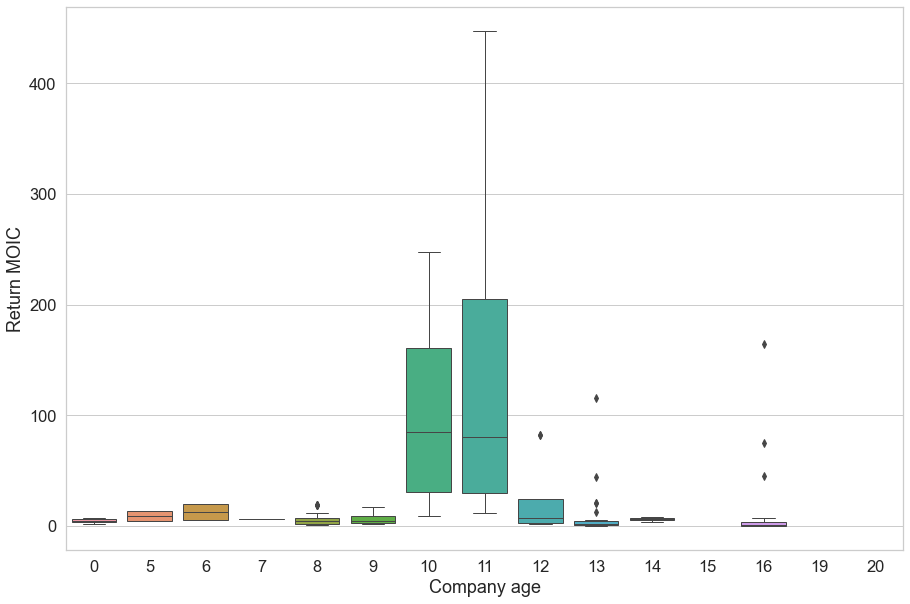

In [25]:
# Relationship of Company age & Return MOIC
sns.set(style="whitegrid",rc={'figure.figsize':(15,10)},font_scale=1.5)
sns.boxplot(x="Company age", y="Return MOIC", data=mergedall, linewidth=1)

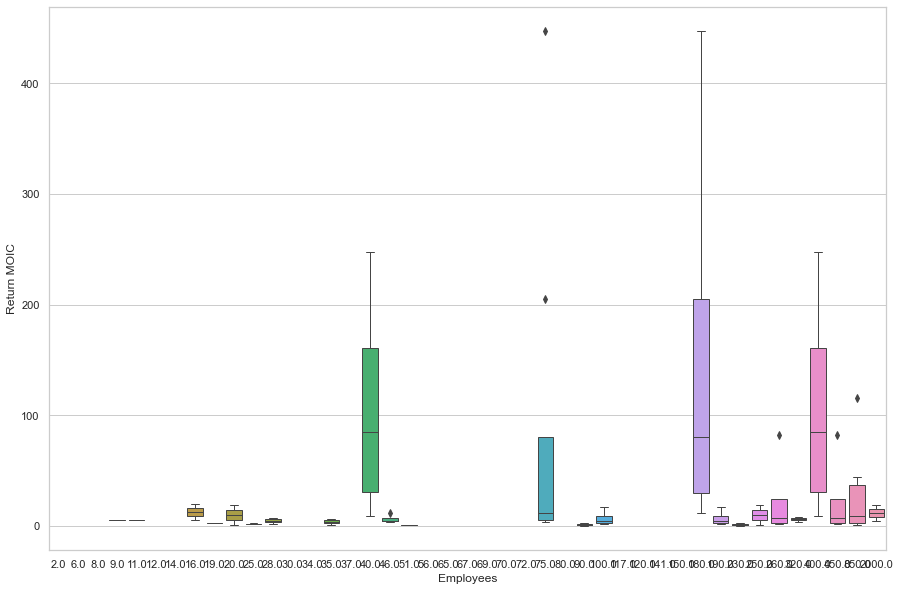

In [31]:
# Relationship of Company age & Deal size
sns.set(style="whitegrid",rc={'figure.figsize':(15,10)},font_scale=1.0)
sns.boxplot(x="Employees", y="Return MOIC", data=mergedall, linewidth=1)